In [ ]:
!pip uninstall gdshelpers
!pip install gdshelpers==<compatible_version>

!pip install --upgrade shapely



left_coupler = GratingCoupler.make_traditional_coupler_from_database([0, 0], 1, 'sn330', 1550)
wg1 = Waveguide.make_at_port(left_coupler.port)
wg1.add_straight_segment(length=10)
wg1.add_bend(-pi/2, radius=50)
wg1.add_straight_segment(length=75)



from math import pi
from gdshelpers.geometry.chip import Cell
from gdshelpers.parts.waveguide import Waveguide
from gdshelpers.parts.coupler import GratingCoupler
from gdshelpers.parts.resonator import RingResonator
from gdshelpers.parts.interferometer import MachZehnderInterferometer




mz = MachZehnderInterferometer.make_at_port(wg1.current_port, splitter_length=15, splitter_separation=5, bend_radius=10, upper_vertical_length=5, lower_vertical_length=5, horizontal_length=15)


wg2 = Waveguide.make_at_port(mz.port)
wg2.add_straight_segment(length=75)
wg2.add_bend(-pi/2, radius=50)
wg2.add_straight_segment(length=10)
right_coupler = GratingCoupler.make_traditional_coupler_from_database_at_port(wg2.current_port, 'sn330', 1550)

cell = Cell('SIMPLE_DEVICE')
cell.add_to_layer(1, left_coupler, wg1, mz, wg2, right_coupler)
cell.show()
cell.save('chip.gds')


In [ ]:
import gdsfactory as gf
from math import pi

# Define the grating coupler
left_coupler = gf.components.grating_coupler_elliptical_te()

# Create a new blank component with a unique name
component = gf.Component("SIMPLE_DEVICE_5")  # Changed name to avoid conflict

# Add the grating coupler to the component
left_coupler_ref = component << left_coupler

# Create the first waveguide, starting from the grating coupler port
wg1 = gf.components.straight(length=10)
wg1_ref = component << wg1
wg1_ref.connect("o1", left_coupler_ref.ports["o1"])

# Add a bend to the waveguide
bend = gf.components.bend_euler(angle=-pi/2, radius=50)
bend_ref = component << bend
bend_ref.connect("o1", wg1_ref.ports["o2"])

# Add a straight segment to the waveguide
wg1_straight = gf.components.straight(length=75)
wg1_straight_ref = component << wg1_straight
wg1_straight_ref.connect("o1", bend_ref.ports["o2"])

# Plot and save the component
component.plot()
component.write_gds('chip.gds')


In [71]:
import gdsfactory as gf
from math import pi

# Define the grating coupler
left_coupler = gf.components.grating_coupler_elliptical_te()
right_coupler = gf.components.grating_coupler_elliptical_te()

# Create a new component with a unique name
component = gf.Component("Hamed_MZI08")

# Add the left grating coupler to the component
left_coupler_ref = component << left_coupler
left_coupler_ref.move((0, 0))  # Position the left coupler at (0, 0)

# Create the first waveguide and add it to the component
wg1 = gf.components.straight(length=10)
wg1_ref = component << wg1
wg1_ref.connect("o1", left_coupler_ref.ports["o1"])

# Add a bend to the waveguide
bend = gf.components.bend_euler(angle=-pi/2, radius=50)
bend_ref = component << bend
bend_ref.connect("o1", wg1_ref.ports["o2"])

# Add a straight segment to the waveguide
wg1_straight = gf.components.straight(length=75)
wg1_straight_ref = component << wg1_straight
wg1_straight_ref.connect("o1", bend_ref.ports["o2"])

# Create the Mach-Zehnder Interferometer (MZI)
mz = gf.components.mzi()  # Use default parameters or specify compatible ones
mz_ref = component << mz
mz_ref.connect("o1", wg1_straight_ref.ports["o2"])

# Align the second waveguide and add it to the component
wg2 = gf.components.straight(length=75)
wg2_ref = component << wg2
wg2_ref.connect("o1", mz_ref.ports["o2"])

# Add a bend to the second waveguide
bend2 = gf.components.bend_euler(angle=-pi/2, radius=50)
bend2_ref = component << bend2
bend2_ref.connect("o1", wg2_ref.ports["o2"])

# Add a final straight segment to the second waveguide
wg2_straight = gf.components.straight(length=10)
wg2_straight_ref = component << wg2_straight
wg2_straight_ref.connect("o1", bend2_ref.ports["o2"])

# Position the right grating coupler
right_coupler_ref = component << right_coupler
bbox = right_coupler_ref.bbox()  # Get the bounding box of the coupler
right_coupler_width = bbox[1][0] - bbox[0][0]  # Calculate the width
right_coupler_ref.move((wg2_straight_ref.xmax + right_coupler_width / 2, 0))  # Adjust to be aligned with the end of wg2_straight

# Connect the right grating coupler to the final waveguide segment
right_coupler_ref.connect("o1", wg2_straight_ref.ports["o2"])

# Plot and save the component
component.plot()
component.write_gds('chip.gds')
component.show()


C:\Users\Hamed\AppData\Local\Temp\ipykernel_9424\2802892676.py:13: UserWarning: Getting `grating_coupler_ellipti_07e69d9a_20097_0.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `grating_coupler_ellipti_07e69d9a_20097_0.dmove` instead.
  left_coupler_ref.move((0, 0))  # Position the left coupler at (0, 0)


TypeError: 'Box' object is not subscriptable

C:\Users\Hamed\AppData\Local\Temp\ipykernel_9424\2041652948.py:59: UserWarning: Getting `grating_coupler_ellipti_07e69d9a_20097_0.movey` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `grating_coupler_ellipti_07e69d9a_20097_0.dmovey` instead.
  right_coupler_ref.movey(offset_y)


WindowsPath('chip.gds')

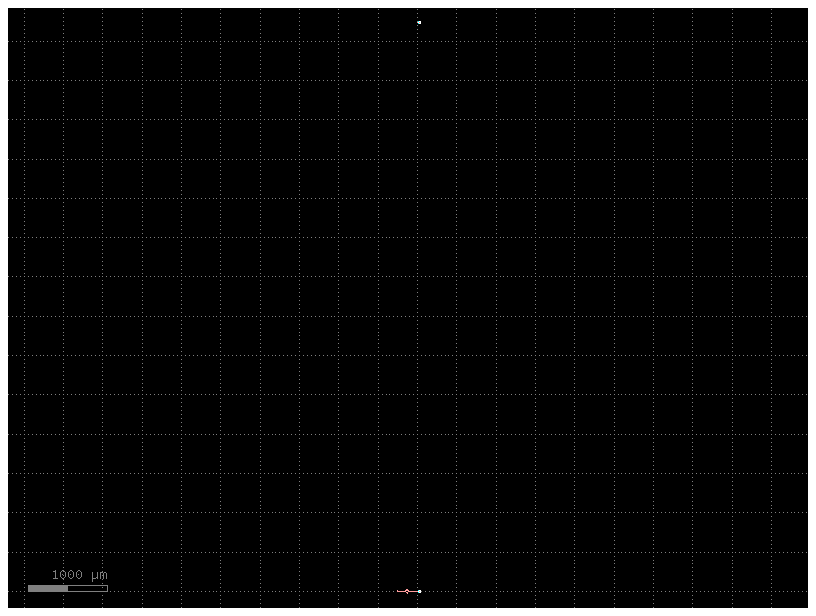

In [48]:
import gdsfactory as gf
from math import pi

# Define the left grating coupler
left_coupler = gf.components.grating_coupler_elliptical_te()

# Create a new component with a unique name
component = gf.Component("SIMPLE_DVICE_00")

# Add the left grating coupler to the component
left_coupler_ref = component << left_coupler

# Create the first waveguide, starting from the grating coupler port
wg1 = gf.components.straight(length=10)
wg1_ref = component << wg1
wg1_ref.connect("o1", left_coupler_ref.ports["o1"])

# Add a bend to the waveguide
bend = gf.components.bend_euler(angle=-pi/2, radius=50)
bend_ref = component << bend
bend_ref.connect("o1", wg1_ref.ports["o2"])

# Add a straight segment to the waveguide
wg1_straight = gf.components.straight(length=75)
wg1_straight_ref = component << wg1_straight
wg1_straight_ref.connect("o1", bend_ref.ports["o2"])

# Create the Mach-Zehnder Interferometer (MZI)
mz = gf.components.mzi()
mz_ref = component << mz
mz_ref.connect("o1", wg1_straight_ref.ports["o2"])

# Create the second waveguide and add it to the component
wg2 = gf.components.straight(length=75)
wg2_ref = component << wg2
wg2_ref.connect("o1", mz_ref.ports["o2"])

# Add a bend to the second waveguide
bend2 = gf.components.bend_euler(angle=-pi/2, radius=50)
bend2_ref = component << bend2
bend2_ref.connect("o1", wg2_ref.ports["o2"])

# Add a final straight segment to the second waveguide
wg2_straight = gf.components.straight(length=10)
wg2_straight_ref = component << wg2_straight
wg2_straight_ref.connect("o1", bend2_ref.ports["o2"])

# Define the right grating coupler
right_coupler = gf.components.grating_coupler_elliptical_te()

# Add the right grating coupler to the component
right_coupler_ref = component << right_coupler

# Ensure the right grating coupler is aligned correctly
# The offset needed to align the coupler with the last waveguide segment
offset_y = wg2_straight_ref.ports["o2"].y - right_coupler_ref.ports["o1"].y

# Move the right grating coupler to align it properly
right_coupler_ref.movey(offset_y)

# Plot and save the component
component.plot()
component.write_gds('chip.gds')


C:\Users\Hamed\AppData\Local\Temp\ipykernel_9424\3333973414.py:13: UserWarning: Getting `grating_coupler_ellipti_07e69d9a_20097_0.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `grating_coupler_ellipti_07e69d9a_20097_0.dmove` instead.
  left_coupler_ref.move((0, 0))  # Position the left coupler at (0, 0)


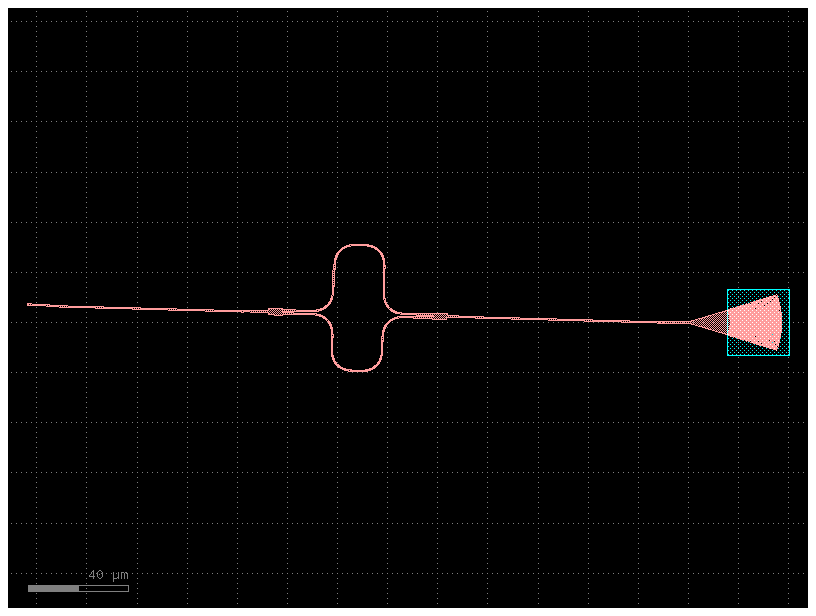

In [77]:
import gdsfactory as gf
from math import pi

# Define the grating coupler
left_coupler = gf.components.grating_coupler_elliptical_te()
right_coupler = gf.components.grating_coupler_elliptical_te()

# Create a new component with a unique name
component = gf.Component("Hamed_MZI11")

# Add the left grating coupler to the component
left_coupler_ref = component << left_coupler
left_coupler_ref.move((0, 0))  # Position the left coupler at (0, 0)

# Create the first waveguide and add it to the component
wg1 = gf.components.straight(length=10)
wg1_ref = component << wg1
wg1_ref.connect("o1", left_coupler_ref.ports["o1"])

# Add a bend to the waveguide
bend = gf.components.bend_euler(angle=-pi/2, radius=50)
bend_ref = component << bend
bend_ref.connect("o1", wg1_ref.ports["o2"])

# Add a straight segment to the waveguide
wg1_straight = gf.components.straight(length=75)
wg1_straight_ref = component << wg1_straight
wg1_straight_ref.connect("o1", bend_ref.ports["o2"])

# Create the Mach-Zehnder Interferometer (MZI)
mz = gf.components.mzi()  # Use default parameters or specify compatible ones
mz_ref = component << mz
mz_ref.connect("o1", wg1_straight_ref.ports["o2"])

# Align the second waveguide and add it to the component
wg2 = gf.components.straight(length=75)
wg2_ref = component << wg2
wg2_ref.connect("o1", mz_ref.ports["o2"])

# Add a bend to the second waveguide
bend2 = gf.components.bend_euler(angle=-pi/2, radius=50)
bend2_ref = component << bend2
bend2_ref.connect("o1", wg2_ref.ports["o2"])

# Add a final straight segment to the second waveguide
wg2_straight = gf.components.straight(length=10)
wg2_straight_ref = component << wg2_straight
wg2_straight_ref.connect("o1", bend2_ref.ports["o2"])

# Position the right grating coupler
right_coupler_ref = component << right_coupler
bbox = right_coupler_ref.bbox()  # Get the bounding box of the coupler
right_coupler_width = bbox[1][0] - bbox[0][0]  # Calculate the width of the bounding box


# Move the right grating coupler to align with the end of wg2_straight
x_position = wg2_straight_ref.xmax + right_coupler_width / 2
right_coupler_ref.move((x_position, 0))

# Connect the right grating coupler to the final waveguide segment
right_coupler_ref.connect("o1", wg2_straight_ref.ports["o2"])



# Plot and save the component
component.plot()
component.write_gds('chip.gds')
component.show()


In [80]:
#from the library tutrial 

# Import necessary modules
import sys
import subprocess

# Function to check and install packages
def install_package(package_name):
    try:
        __import__(package_name)
    except ImportError:
        print(f"{package_name} not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

# Check and install required packages
install_package('gdsfactory')
install_package('gplugins')

# Additional installation for gplugins dependencies
def install_gplugins():
    try:
        import gplugins
    except ImportError:
        print("gplugins not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", 'gplugins[tidy3d,sax]'])

install_gplugins()

# Install system packages manually if needed (not usually done in notebooks)
# You can manually install system packages via your OS's package manager (apt for Ubuntu/Debian, brew for macOS, etc.)
# For example: sudo apt install python3-gmsh gmsh


In [81]:
from typing import Optional

import numpy as np
import gdsfactory as gf
from gdsfactory.generic_tech import get_generic_pdk

In [83]:
def mzi(
    wl: np.ndarray,
    neff: Optional[float],
    neff1: Optional[float] = None,
    neff2: Optional[float] = None,
    delta_length: Optional[float] = None,
    length1: Optional[float] = 0,
    length2: Optional[float] = None,
) -> np.ndarray:
    """Returns Frequency Domain Response of an MZI interferometer in linear units.

    Args:
        wl: wavelength in  um.
        neff: effective index.
        neff1: effective index branch 1.
        neff2: effective index branch 2.
        delta_length: length difference L2-L1.
        length1: length of branch 1.
        length2: length of branch 2.
    """
    k_0 = 2 * np.pi / wl
    length2 = length2 or length1 + delta_length
    delta_length = delta_length or np.abs(length2 - length1)
    neff1 = neff1 or neff
    neff2 = neff2 or neff

    E_out = 0.5 * (
        np.exp(1j * k_0 * neff1 * (length1 + delta_length))
        + np.exp(1j * k_0 * neff2 * length1)
    )
    return np.abs(E_out) ** 2




pi_length = 1452um for 1nm width variation
pi_length = 290um for 5nm width variation
pi_length = 145um for 10nm width variation


C:\Users\Hamed\AppData\Local\Temp\ipykernel_37412\985714324.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


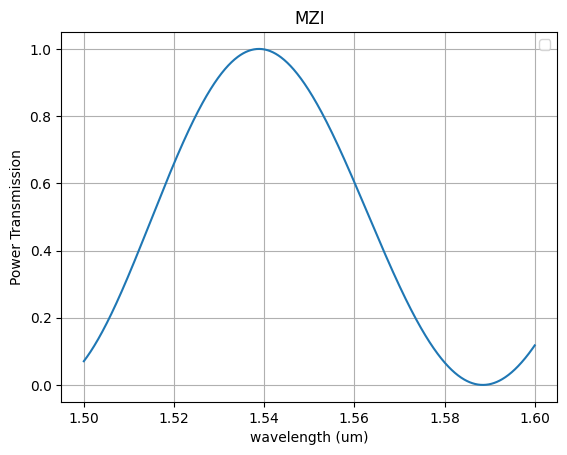

In [1]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt

def mzi(
    wl: np.ndarray,
    neff: Optional[float],
    neff1: Optional[float] = None,
    neff2: Optional[float] = None,
    delta_length: Optional[float] = None,
    length1: Optional[float] = 0,
    length2: Optional[float] = None,
) -> np.ndarray:
    """Returns Frequency Domain Response of an MZI interferometer in linear units.

    Args:
        wl: wavelength in um.
        neff: effective index.
        neff1: effective index branch 1.
        neff2: effective index branch 2.
        delta_length: length difference L2-L1.
        length1: length of branch 1.
        length2: length of branch 2.
    """
    k_0 = 2 * np.pi / wl
    length2 = length2 or length1 + delta_length
    delta_length = delta_length or np.abs(length2 - length1)
    neff1 = neff1 or neff
    neff2 = neff2 or neff

    E_out = 0.5 * (
        np.exp(1j * k_0 * neff1 * (length1 + delta_length))
        + np.exp(1j * k_0 * neff2 * length1)
    )
    return np.abs(E_out) ** 2

if __name__ == "__main__":
    import gplugins.tidy3d as gt

    nm = 1e-3
    strip = gt.modes.Waveguide(
        wavelength=1.55,
        core_width=500 * nm,
        core_thickness=220 * nm,
        slab_thickness=0.0,
        core_material="si",
        clad_material="sio2",
    )

    neff = 2.46  # Effective index of the waveguides
    wl0 = 1.55  # [μm] the wavelength at which neff and ng are defined
    wl = np.linspace(1.5, 1.6, 1000)  # [μm] Wavelengths to sweep over
    ngs = [4.182551, 4.169563, 4.172917]
    thicknesses = [210, 220, 230]

    length = 4e3
    dn = np.pi / length

    polyfit_TE1550SOI_220nm = np.array(
        [
            1.02478963e-09,
            -8.65556534e-08,
            3.32415694e-06,
            -7.68408985e-05,
            1.19282177e-03,
            -1.31366332e-02,
            1.05721429e-01,
            -6.31057637e-01,
            2.80689677e00,
            -9.26867694e00,
            2.24535191e01,
            -3.90664800e01,
            4.71899278e01,
            -3.74726005e01,
            1.77381560e01,
            -1.12666286e00,
        ]
    )
    neff_w = lambda w: np.poly1d(polyfit_TE1550SOI_220nm)(w)

    w0 = 450 * nm
    dn1 = neff_w(w0 + 1 * nm / 2) - neff_w(w0 - 1 * nm / 2)
    dn5 = neff_w(w0 + 5 * nm / 2) - neff_w(w0 - 5 * nm / 2)
    dn10 = neff_w(w0 + 10 * nm / 2) - neff_w(w0 - 10 * nm / 2)

    pi_length1 = np.pi / dn1
    pi_length5 = np.pi / dn5
    pi_length10 = np.pi / dn10

    print(f"pi_length = {pi_length1:.0f}um for 1nm width variation")
    print(f"pi_length = {pi_length5:.0f}um for 5nm width variation")
    print(f"pi_length = {pi_length10:.0f}um for 10nm width variation")

    dn = dn1
    p = mzi(wl, neff=neff, neff1=neff + dn, neff2=neff + dn, delta_length=10)
    plt.plot(wl, p)
    plt.title("MZI")
    plt.xlabel("wavelength (um)")
    plt.ylabel("Power Transmission")
    plt.grid()
    plt.legend()
    plt.show()


2024-08-23 12:50:26.310 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\Hamed\.gdsfactory\modes\Waveguide_8a7a5232aa00fbbb.npz.
2024-08-23 13:00:16.186 | WARNING  | kfactory.kcell:show:7885 - Could not connect to klive server
2024-08-23 13:00:48.707 | WARNING  | kfactory.kcell:show:7885 - Could not connect to klive server
2024-08-23 13:01:02.938 | WARNING  | kfactory.kcell:show:7885 - Could not connect to klive server
2024-08-23 13:01:08.699 | WARNING  | kfactory.kcell:show:7885 - Could not connect to klive server
2024-08-23 13:01:15.473 | WARNING  | kfactory.kcell:show:7885 - Could not connect to klive server
2024-08-23 13:02:48.660 | WARNING  | kfactory.kcell:show:7885 - Could not connect to klive server
2024-08-23 13:03:46.723 | WARNING  | kfactory.kcell:show:7885 - Could not connect to klive server
2024-08-23 13:04:55.562 | WARNING  | kfactory.kcell:show:7885 - Could not connect to klive server
2024-08-23 13:05:50.364 | INFO     | kfactory.kcell:show:7894 - 

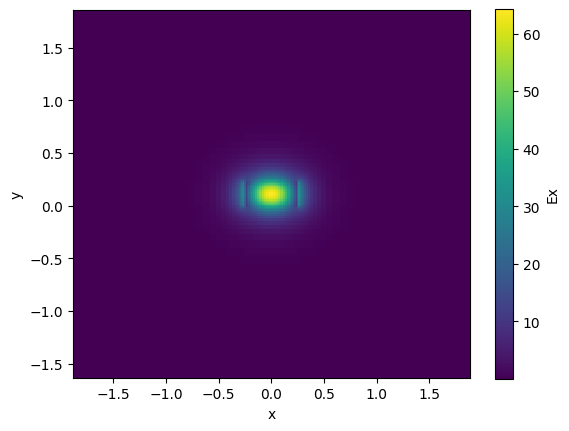

In [2]:
import numpy as np
import gplugins.tidy3d as gt
import matplotlib.pyplot as plt

nm = 1e-3
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=0.5,
    core_thickness=0.22,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
    group_index_step=10 * nm,
)
strip.plot_field(field_name="Ex", mode_index=0)  # TE

In [3]:
ng = strip.n_group[0]
ng


4.178039693572358

12:52:05 W. Europe Daylight Time WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

12:52:06 W. Europe Daylight Time WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

Output()

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 Started working on Batch containing 3 tasks.

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

ValueError: API key not found. To get your API key, sign into 'https://tidy3d.simulation.cloud' and copy it from your 'Account' page. Then you can configure tidy3d through command line 'tidy3d configure' and enter your API key when prompted. Alternatively, especially if using windows, you can manually create the configuration file by creating a file at their home directory '~/.tidy3d/config' (unix) or '.tidy3d/config' (windows) containing the following line: apikey = 'XXX'. Here XXX is your API key copied from your account page within quotes.

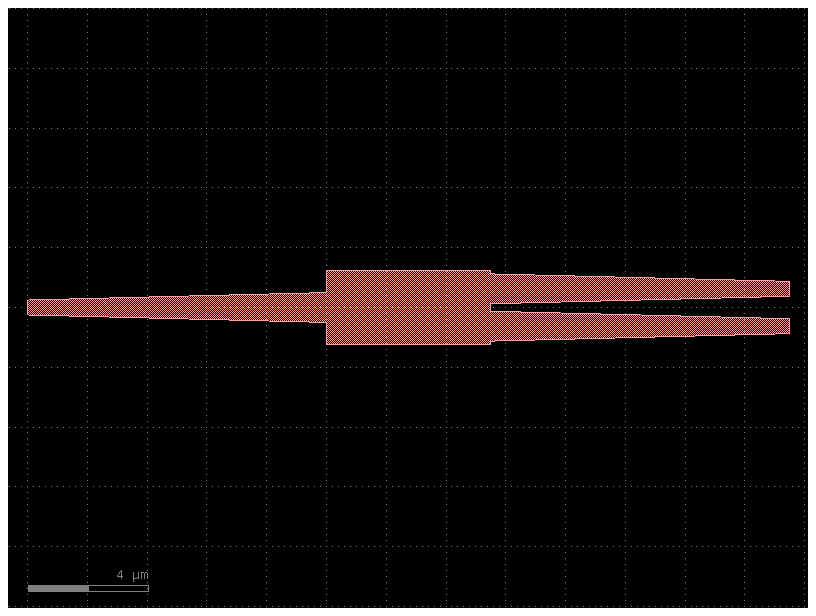

In [8]:
import gplugins as sim
import gdsfactory as gf
import gplugins.tidy3d as gt
import gdsfactory.components as pdk
from gdsfactory.config import PATH
c = pdk.mmi1x2()
c.plot()

sp = gt.write_sparameters(c, filepath="./mmi1x2.npz")

In [6]:
sp = gt.write_sparameters(c, filepath="./mmi1x2.npz")

12:51:06 W. Europe Daylight Time WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

Output()

12:51:07 W. Europe Daylight Time WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 Started working on Batch containing 3 tasks.

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

ValueError: API key not found. To get your API key, sign into 'https://tidy3d.simulation.cloud' and copy it from your 'Account' page. Then you can configure tidy3d through command line 'tidy3d configure' and enter your API key when prompted. Alternatively, especially if using windows, you can manually create the configuration file by creating a file at their home directory '~/.tidy3d/config' (unix) or '.tidy3d/config' (windows) containing the following line: apikey = 'XXX'. Here XXX is your API key copied from your account page within quotes.

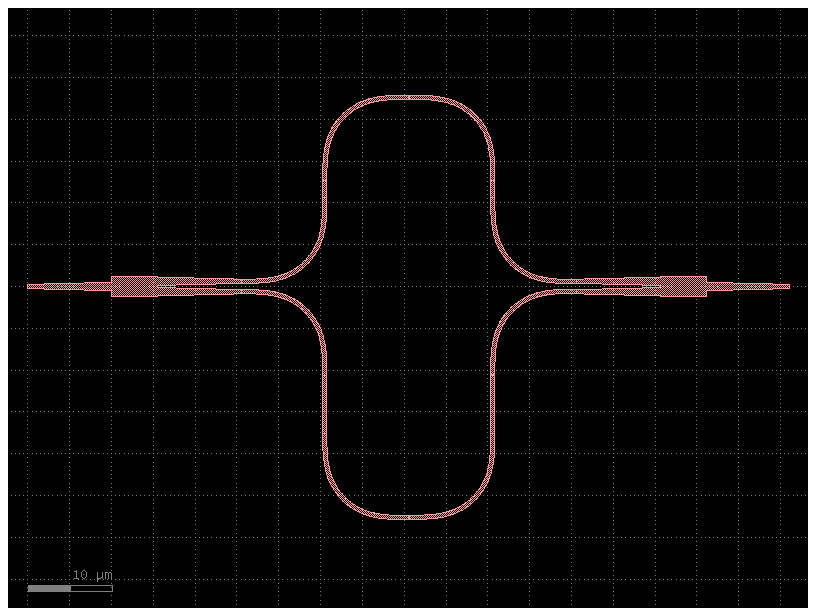

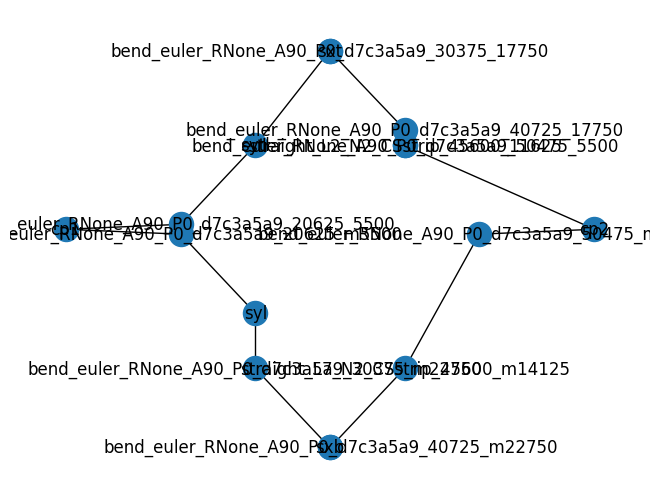

In [10]:
mzi10 = gf.components.mzi(splitter=c, delta_length=10)
mzi10.plot()
mzi10.plot_netlist()


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import sax

import gdsfactory as gf
import gplugins.sax as gsax
def straight(wl=1.5, length=10.0, neff=2.4) -> sax.SDict:
    wl0 = 1.5  # center wavelength for which the waveguide model is defined
    return sax.reciprocal({("o1", "o2"): jnp.exp(2j * jnp.pi * neff * length / wl)})


def bend_euler(wl=1.5, length=20.0):
    """Assumes a reduced transmission for the euler bend compared to a straight"""
    return {k: 0.99 * v for k, v in straight(wl=wl, length=length).items()}


mmi1x2 = gsax.read.model_from_npz(sp)
models = {
    "bend_euler": bend_euler,
    "mmi1x2": mmi1x2,
    "straight": straight,
}

netlist = mzi10.get_netlist()
circuit, _ = sax.circuit(netlist=netlist, models=models)

NameError: name 'sp' is not defined

pi_length = 1452um for 1nm width variation
pi_length = 290um for 5nm width variation
pi_length = 145um for 10nm width variation


C:\Users\Hamed\AppData\Local\Temp\ipykernel_37412\985714324.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


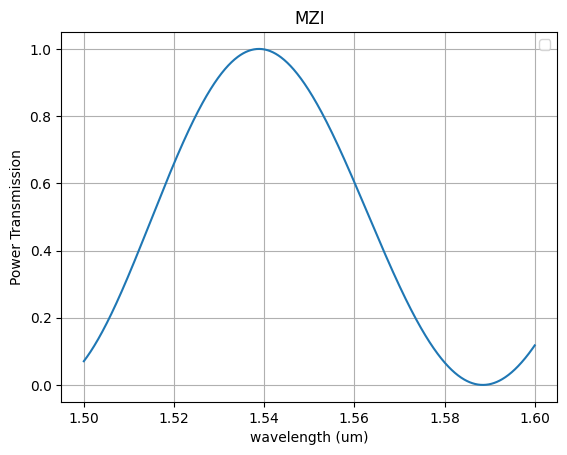

In [ ]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt

def mzi(
    wl: np.ndarray,
    neff: Optional[float],
    neff1: Optional[float] = None,
    neff2: Optional[float] = None,
    delta_length: Optional[float] = None,
    length1: Optional[float] = 0,
    length2: Optional[float] = None,
) -> np.ndarray:
    """Returns Frequency Domain Response of an MZI interferometer in linear units.

    Args:
        wl: wavelength in um.
        neff: effective index.
        neff1: effective index branch 1.
        neff2: effective index branch 2.
        delta_length: length difference L2-L1.
        length1: length of branch 1.
        length2: length of branch 2.
    """
    k_0 = 2 * np.pi / wl
    length2 = length2 or length1 + delta_length
    delta_length = delta_length or np.abs(length2 - length1)
    neff1 = neff1 or neff
    neff2 = neff2 or neff

    E_out = 0.5 * (
        np.exp(1j * k_0 * neff1 * (length1 + delta_length))
        + np.exp(1j * k_0 * neff2 * length1)
    )
    return np.abs(E_out) ** 2

if __name__ == "__main__":
    import gplugins.tidy3d as gt

    nm = 1e-3
    strip = gt.modes.Waveguide(
        wavelength=1.55,
        core_width=500 * nm,
        core_thickness=220 * nm,
        slab_thickness=0.0,
        core_material="si",
        clad_material="sio2",
    )

    neff = 2.46  # Effective index of the waveguides
    wl0 = 1.55  # [μm] the wavelength at which neff and ng are defined
    wl = np.linspace(1.5, 1.6, 1000)  # [μm] Wavelengths to sweep over
    ngs = [4.182551, 4.169563, 4.172917]
    thicknesses = [210, 220, 230]

    length = 4e3
    dn = np.pi / length

    polyfit_TE1550SOI_220nm = np.array(
        [
            1.02478963e-09,
            -8.65556534e-08,
            3.32415694e-06,
            -7.68408985e-05,
            1.19282177e-03,
            -1.31366332e-02,
            1.05721429e-01,
            -6.31057637e-01,
            2.80689677e00,
            -9.26867694e00,
            2.24535191e01,
            -3.90664800e01,
            4.71899278e01,
            -3.74726005e01,
            1.77381560e01,
            -1.12666286e00,
        ]
    )
    neff_w = lambda w: np.poly1d(polyfit_TE1550SOI_220nm)(w)

    w0 = 450 * nm
    dn1 = neff_w(w0 + 1 * nm / 2) - neff_w(w0 - 1 * nm / 2)
    dn5 = neff_w(w0 + 5 * nm / 2) - neff_w(w0 - 5 * nm / 2)
    dn10 = neff_w(w0 + 10 * nm / 2) - neff_w(w0 - 10 * nm / 2)

    pi_length1 = np.pi / dn1
    pi_length5 = np.pi / dn5
    pi_length10 = np.pi / dn10

    print(f"pi_length = {pi_length1:.0f}um for 1nm width variation")
    print(f"pi_length = {pi_length5:.0f}um for 5nm width variation")
    print(f"pi_length = {pi_length10:.0f}um for 10nm width variation")

    dn = dn1
    p = mzi(wl, neff=neff, neff1=neff + dn, neff2=neff + dn, delta_length=10)
    plt.plot(wl, p)
    plt.title("MZI")
    plt.xlabel("wavelength (um)")
    plt.ylabel("Power Transmission")
    plt.grid()
    plt.legend()
    plt.show()


In [13]:
try:
    import google.colab

    is_running_on_colab = True
    !pip install gdsfactory > /dev/null

except ImportError:
    is_running_on_colab = False
    


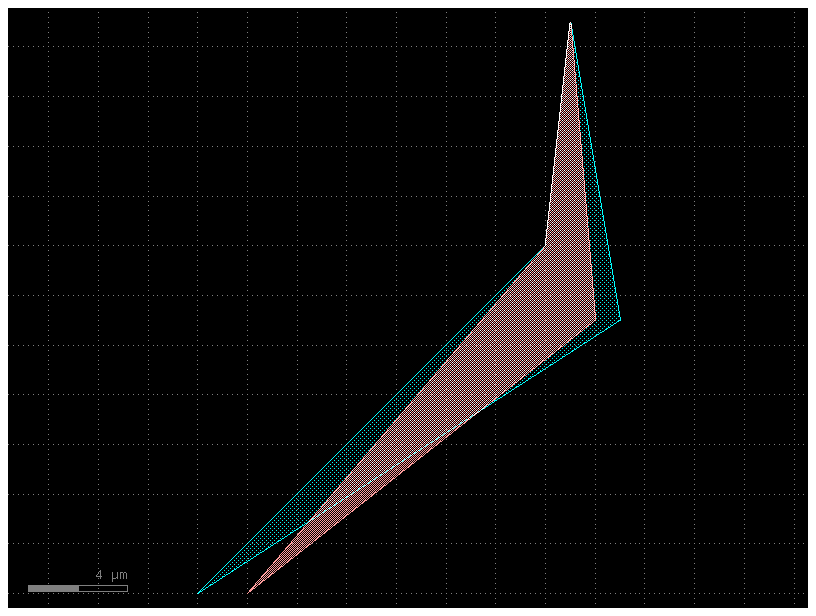

In [18]:
import gdsfactory as gf

c = (
    gf.Component()
)  # Create a blank component (essentially an empty GDS cell with some special features)
p1 = c.add_polygon([(-8, -6), (6, 8), (7, 17), (9, 5)], layer=(2, 0))
p1 = c.add_polygon([(-6, -6), (6, 8), (7, 17), (8, 5)], layer=(1, 0))



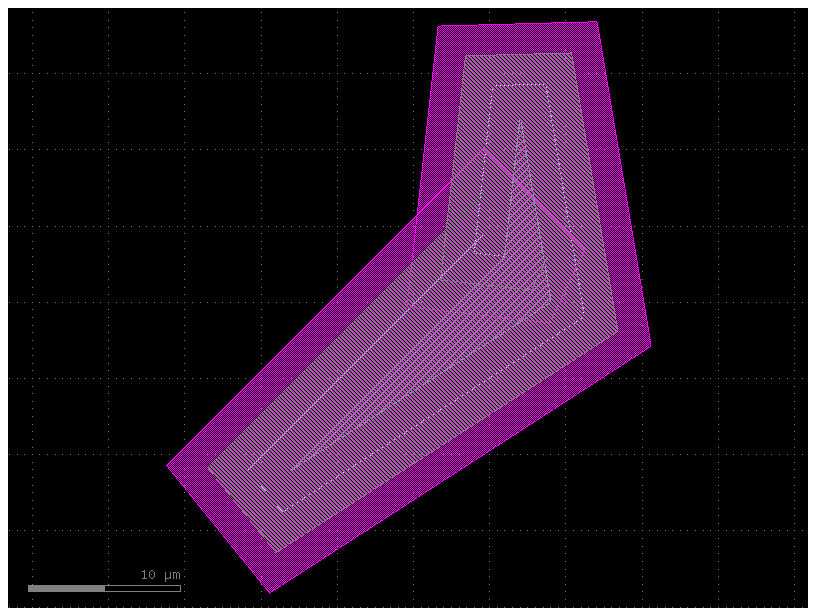

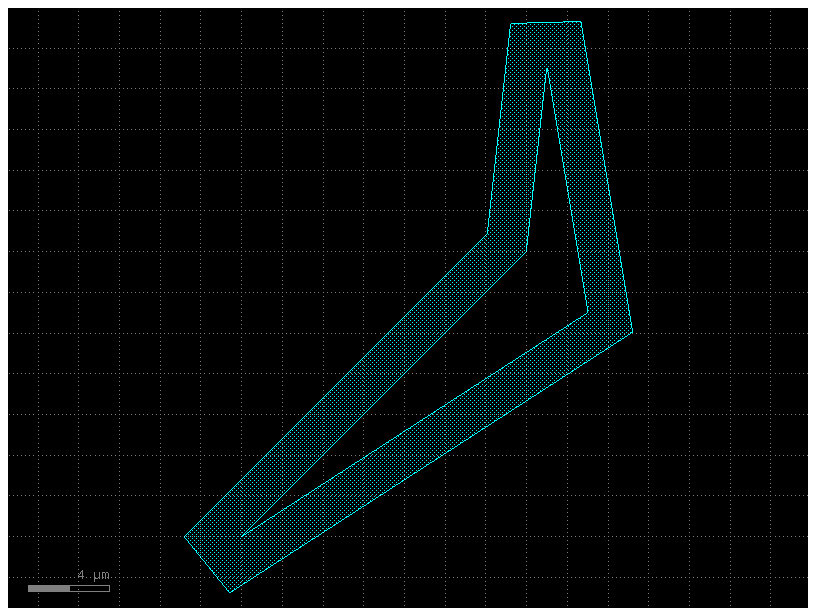

In [32]:
import gdsfactory as gf

# Create a new component
c = gf.Component()

# Define a DPolygon
p1 = gf.kdb.DPolygon([(-8, -6), (6, 8), (7, 17), (9, 5)])  # DPolygons are in micrometers
p2 = p1.sized(2)
p3 = p2.sized(2)  # Scale the polygon by a factor of 2
  # Scale the polygon by a factor of 2
p4 = p3.sized(2)  
# Add polygons to the component
c.add_polygon(p1, layer=(1, 0))

c.add_polygon(p2, layer=(2, 0))
c.add_polygon(p2, layer=(3, 0))
c.add_polygon(p1, layer=(4, 0))

c.add_polygon(p4, layer=(5, 0))
c.add_polygon(p3, layer=(6, 0))



c = gf.Component()
p1 = gf.kdb.DPolygon([(-8, -6), (6, 8), (7, 17), (9, 5)])
r1 = gf.kdb.Region(p1.to_itype(gf.kcl.dbu))  # convert from um to DBU
r2 = r1.sized(2000)  # in DBU
r3 = r2 - r1

c.add_polygon(r3, layer=(2, 0))
c.plot()

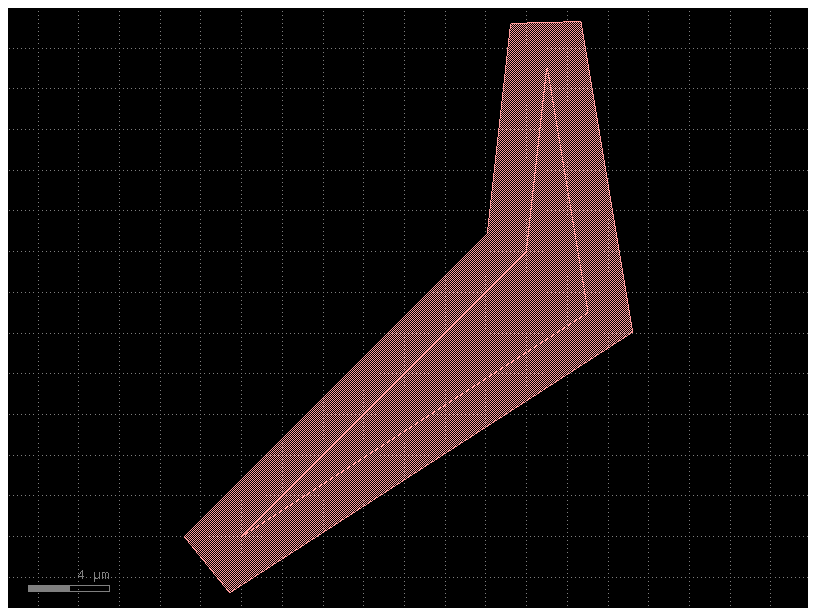

In [39]:
c = gf.Component()
p1 = [(-8, -6), (6, 8), (7, 17), (9, 5)]
s1 = c.add_polygon(p1, layer=(1, 0))
r1 = gf.kdb.Region(s1.polygon)
r2 = r1.sized(2000)  # in DBU, 1 DBU = 1 nm, size it by 2000 nm = 2um
r3 = r2 - r1
c.add_polygon(r3, layer=(1, 0))
c.plot()

Unnamed_75: ports ['o1', 'o2'], Unnamed_77: ports ['o1', 'o2'], 0 instances

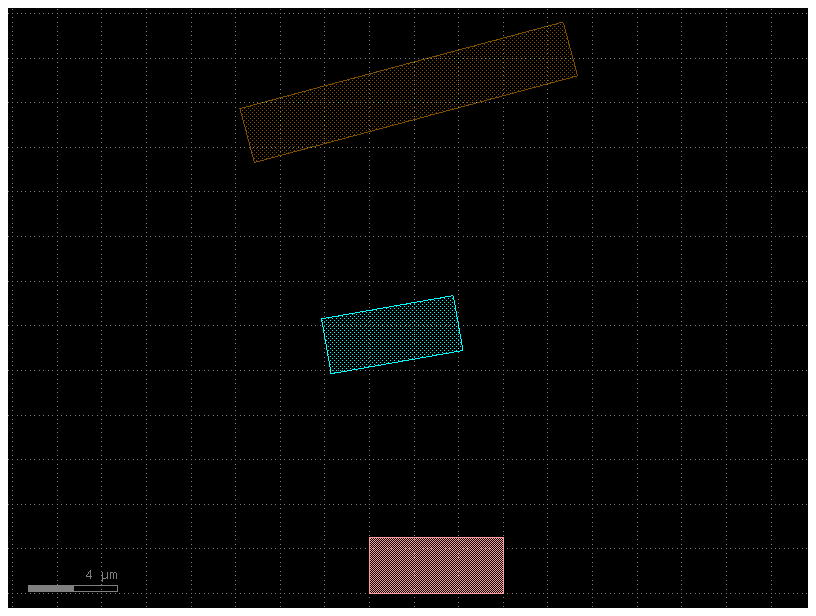

In [49]:
def straight(length=10, width=1, layer=(1, 0)):
    c = gf.Component()
    c.add_polygon([(0, 0), (length, 0), (length, width), (0, width)], layer=layer)
    c.add_port(
        name="o1", center=[0, width / 2], width=width, orientation=180, layer=layer
    )
    c.add_port(
        name="o2", center=[length, width / 2], width=width, orientation=0, layer=layer
    )
    return c


c = gf.Component()

wg1 = c << straight(length=6, width=2.5, layer=(1, 0))
wg2 = c << straight(length=6, width=2.5, layer=(2, 0))
wg3 = c << straight(length=15, width=2.5, layer=(3, 0))
wg2.dmovey(10)
wg2.drotate(10)

wg3.dmovey(20)
wg3.drotate(15)

c.plot()
wg2.dmovex(10)


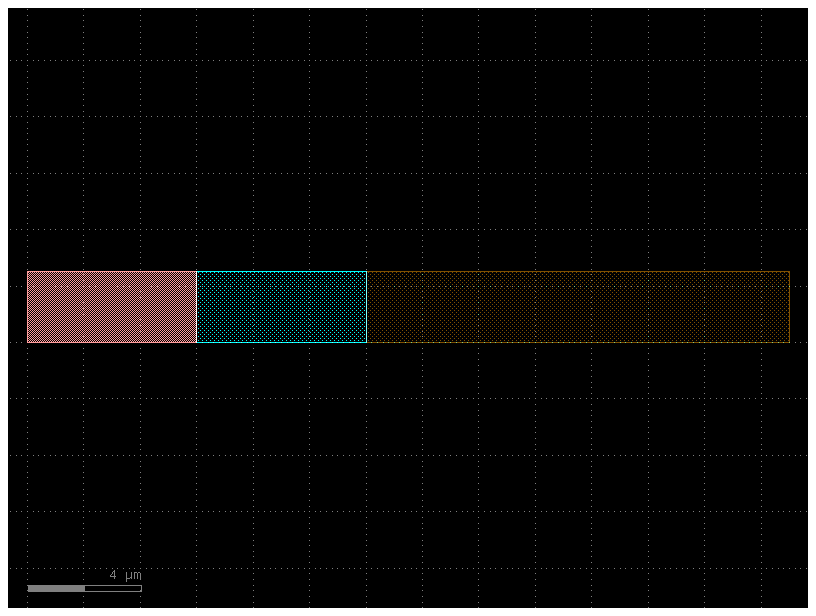

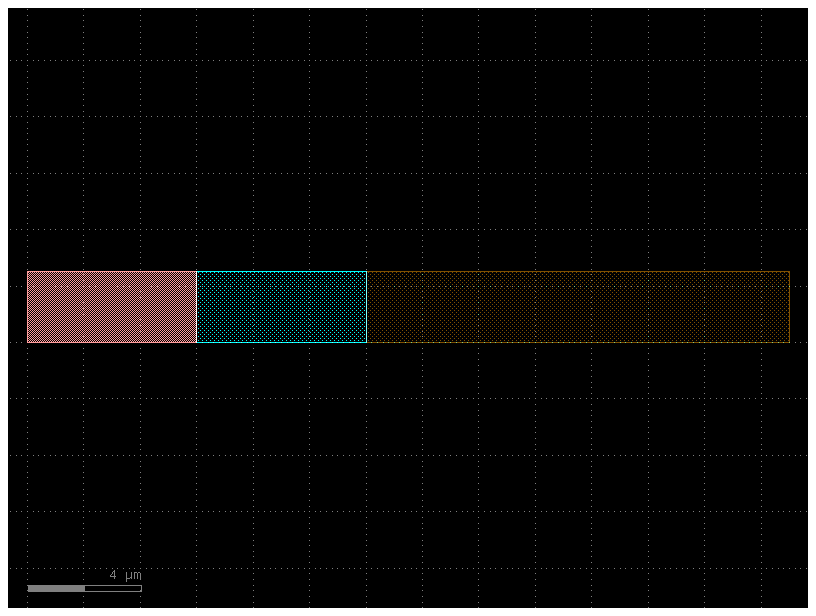

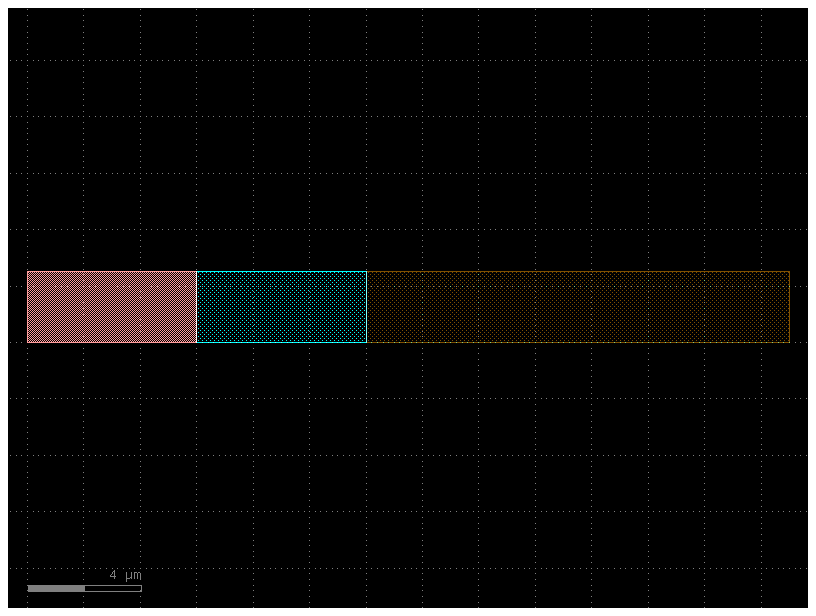

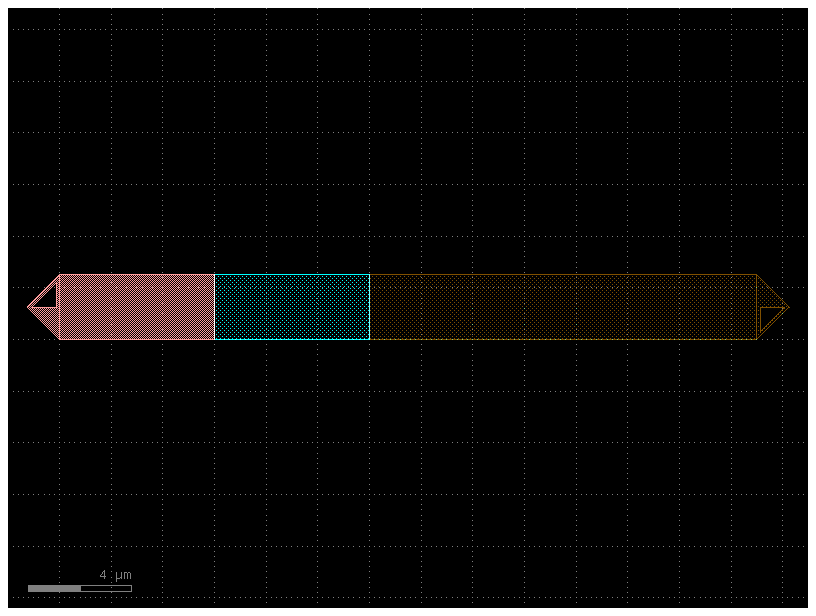

In [53]:
# Let's keep wg1 in place on the bottom, and connect the other straights to it.
# To do that, on wg2 we'll grab the "o1" port and connect it to the "o2" on wg1:
wg2.connect("o1", wg1.ports["o2"], allow_layer_mismatch=True)

# Next, on wg3 let's grab the "o1" port and connect it to the "o2" on wg2:
wg3.connect("o1", wg2.ports["o2"], allow_layer_mismatch=True)

c.plot()
c.add_port("o1", port=wg1.ports["o1"])
c.add_port("o2", port=wg3.ports["o2"])
c.plot()
c.write_gds("demo.gds")  # write it to a GDS file. You can open it in klayout.
c.show()  # show it in klayout
c.plot()  # plot it in jupyter notebook
c.draw_ports()
c.plot()

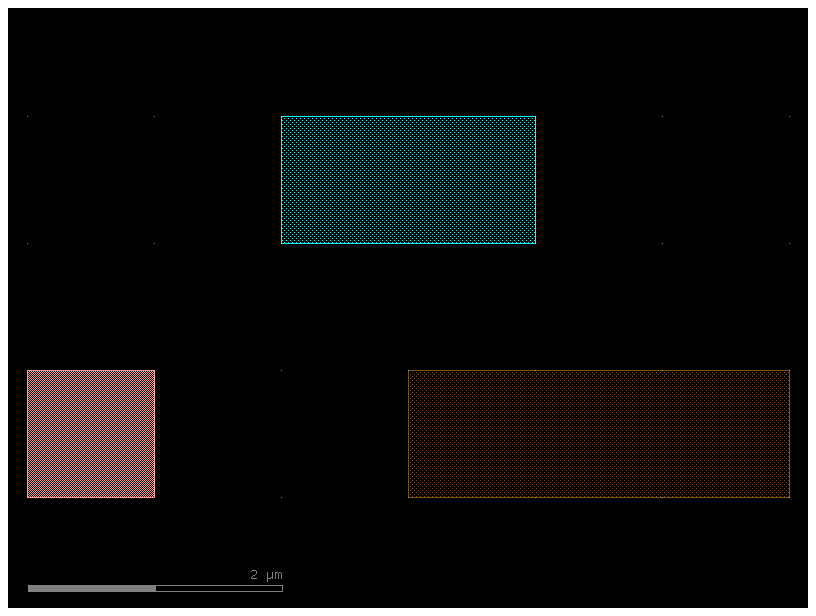

In [54]:
c = gf.Component()

wg1 = c << straight(length=1, layer=(1, 0))
wg2 = c << straight(length=2, layer=(2, 0))
wg3 = c << straight(length=3, layer=(3, 0))

# Shift the second straight we created over by dx = 2, dy = 2 um. D stands for Decimal
wg2.dmove([2.0, 2.0])

# Then, move again the third straight by 3um
wg3.dmovex(3)  # equivalent to wg3.dmove(3)

c.plot()

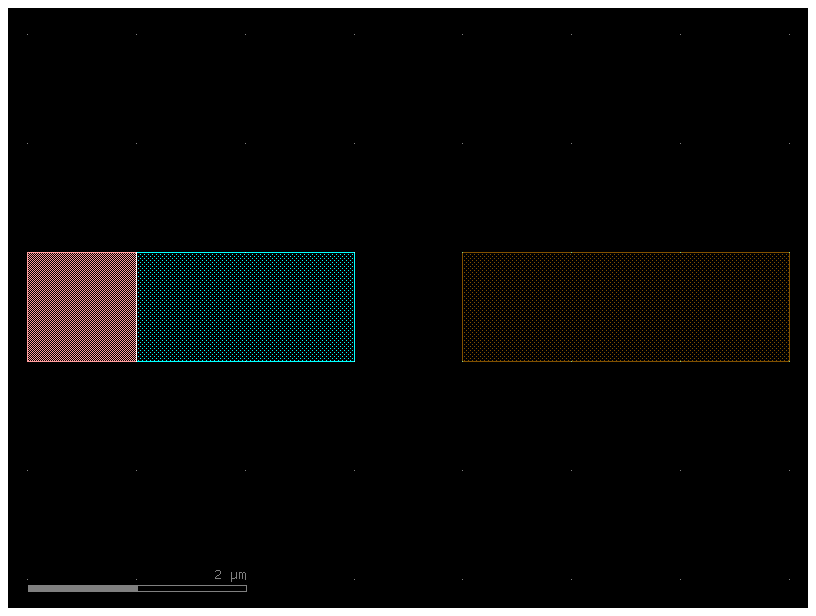

In [55]:
c = gf.Component()

wg1 = c << straight(length=1, layer=(1, 0))
wg2 = c << straight(length=2, layer=(2, 0))
wg3 = c << straight(length=3, layer=(3, 0))

# Shift the second straight we created over so that the xmin matches wg1.dxmax
wg2.dxmin = wg1.dxmax

# Then, leave a 1um gap with on the last straight
wg3.dxmin = wg2.dxmax + 1

c.plot()

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center      ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 1.0   │ 180.0       │ 1     │ (0.0, 0.5)  │ optical   │
│ o2   │ 1.0   │ 0.0         │ 1     │ (10.0, 0.5) │ optical   │
└──────┴───────┴─────────────┴───────┴─────────────┴───────────┘

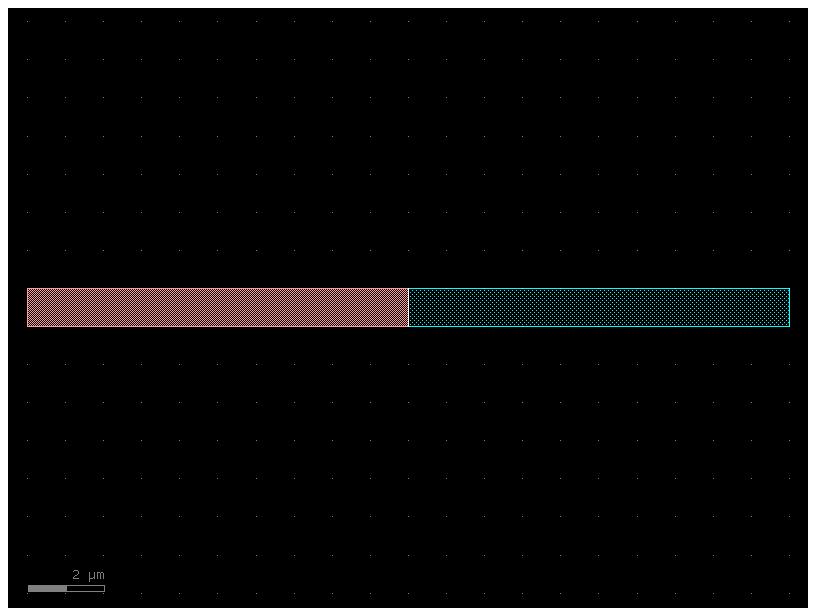

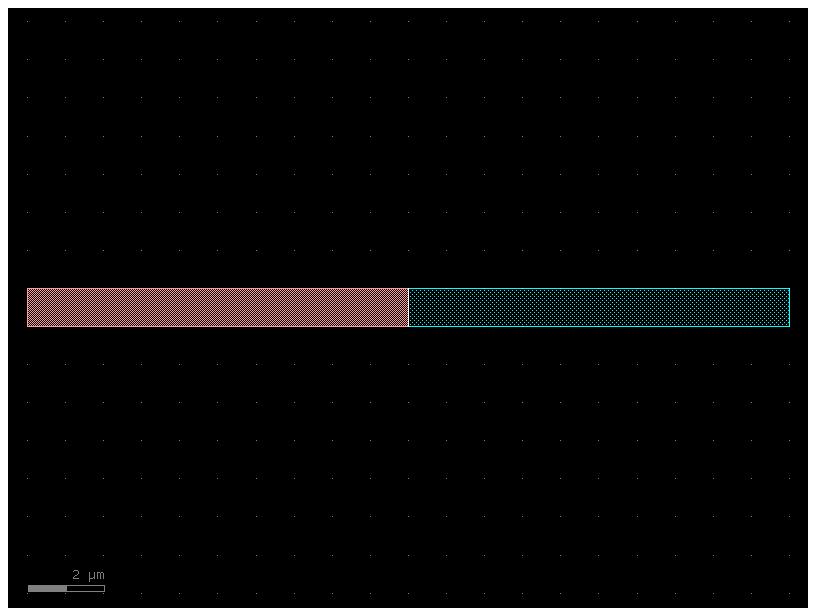

In [60]:
import gdsfactory as gf


def straight(length=10, width=1, layer=(1, 0)):
    c = gf.Component()
    c.add_polygon([(0, 0), (length, 0), (length, width), (0, width)], layer=layer)
    c.add_port(
        name="o1", center=[0, width / 2], width=width, orientation=180, layer=layer
    )
    c.add_port(
        name="o2", center=[length, width / 2], width=width, orientation=0, layer=layer
    )
    return c

s = straight(length=10)
s.ports
s.pprint_ports()

c2 = gf.Component()
wg1 = straight(length=10)
wg2 = straight(length=10, layer=(2, 0))
mwg1_ref = c2.add_ref(wg1)
mwg2_ref = c2.add_ref(wg2)
mwg2_ref.dmovex(10)
c2.plot()
# Like before, let's connect mwg1 and mwg2 together
mwg1_ref.connect(port="o2", other=mwg2_ref.ports["o1"], allow_layer_mismatch=True)
c2.plot()

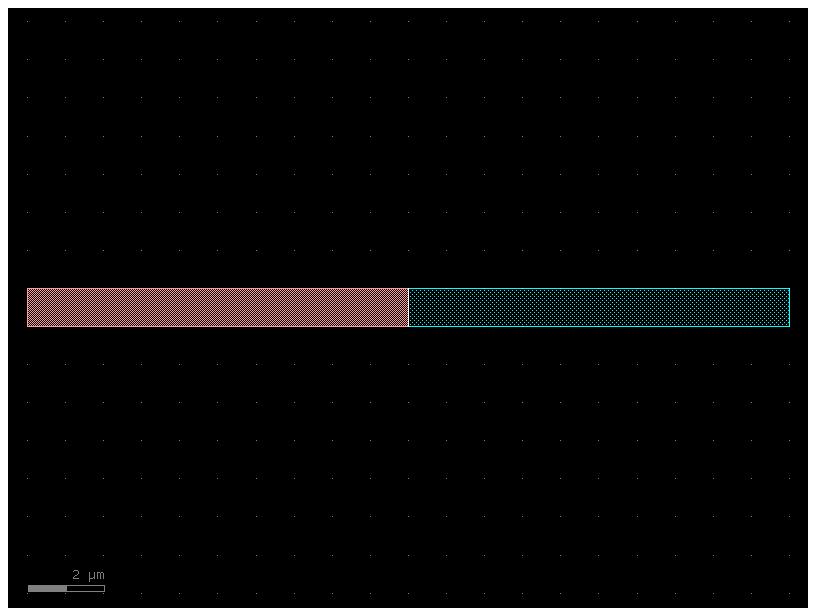

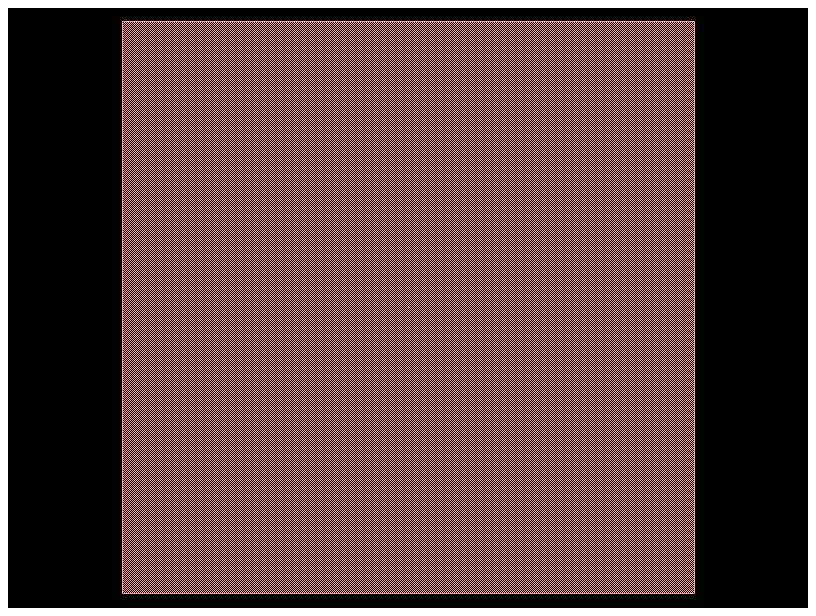

In [62]:
c2.add_label(text="First label", position=mwg1_ref.dcenter)
c2.add_label(text="Second label", position=mwg2_ref.dcenter)

# labels are useful for recording information
c2.add_label(
    text=f"The x size of this\nlayout is {c2.dxsize}",
    position=(c2.dx, c2.dy),
    layer=(10, 0),
)
c2.plot()
c = gf.Component()
r = c << gf.components.rectangle(size=(1, 1))
r.dx = 0
r.dy = 0
c.add_label(
    text="Demo label",
    position=(0, 0),
    layer=(1, 0),
)
c.plot()

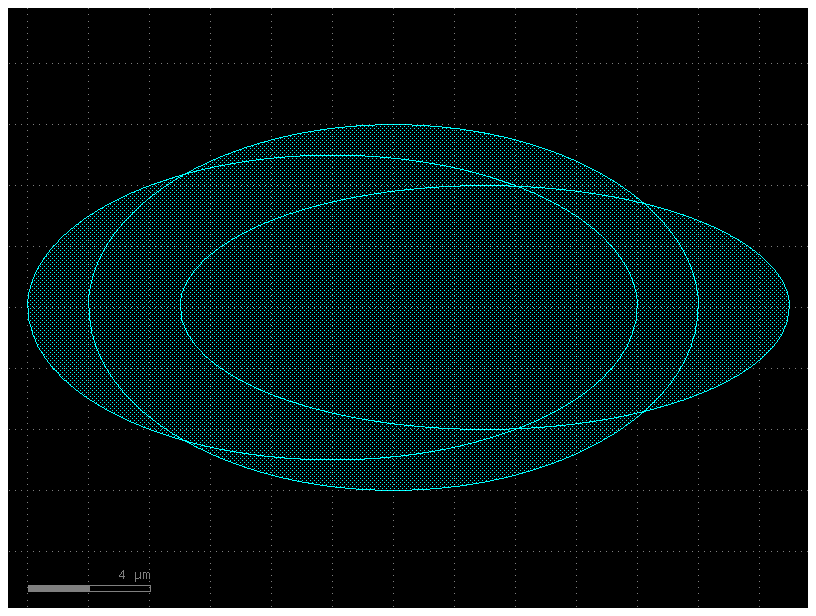

In [63]:
c = gf.Component()
e1 = c.add_ref(gf.components.ellipse(layer=(2, 0)))
e2 = c.add_ref(gf.components.ellipse(radii=(10, 6), layer=(2, 0))).dmovex(2)
e3 = c.add_ref(gf.components.ellipse(radii=(10, 4), layer=(2, 0))).dmovex(5)
c.plot()

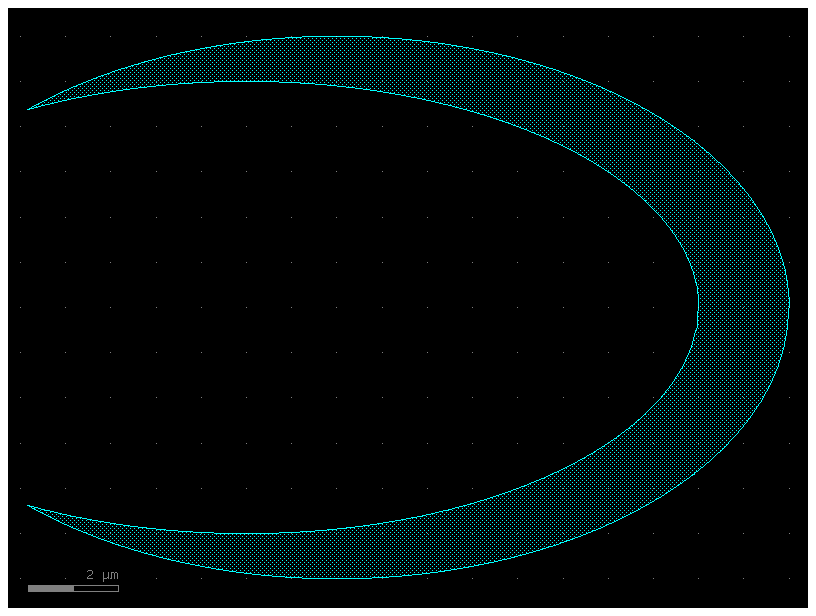

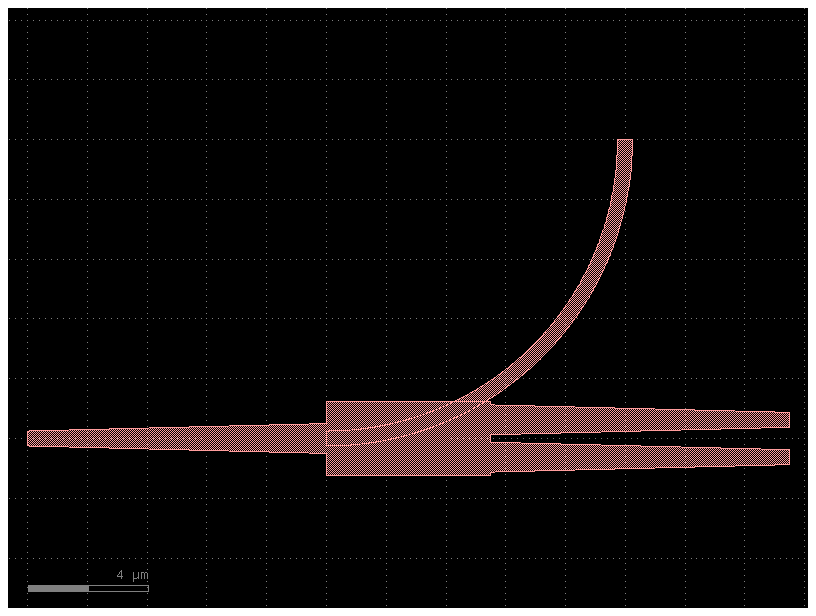

In [65]:
c2 = gf.boolean(A=e2, B=e1, operation="not", layer=(2, 0))
c2.plot()
c = gf.Component()
mmi = c.add_ref(gf.components.mmi1x2())
bend = c.add_ref(gf.components.bend_circular(layer=(1, 0)))
c.plot()

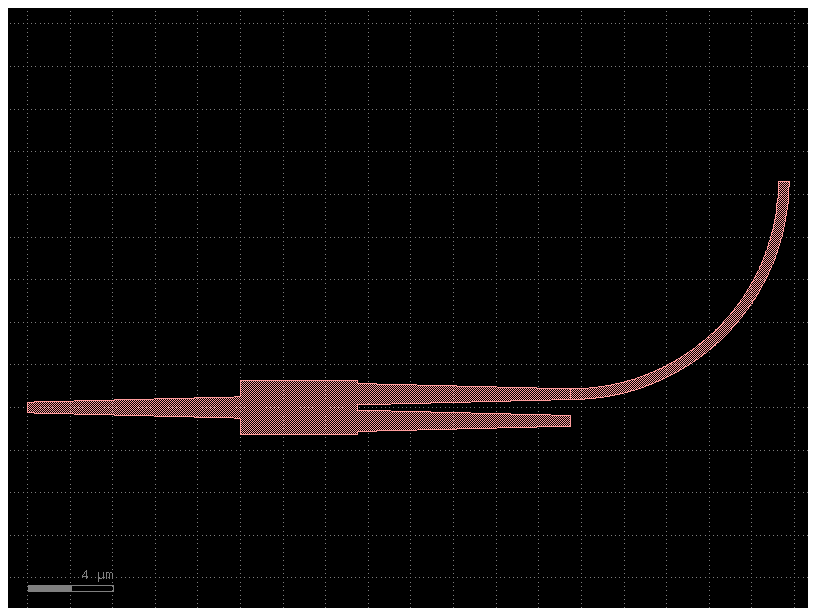

In [66]:
bend.connect("o1", mmi.ports["o2"])  # connects follow Source -> Destination syntax
c.plot()

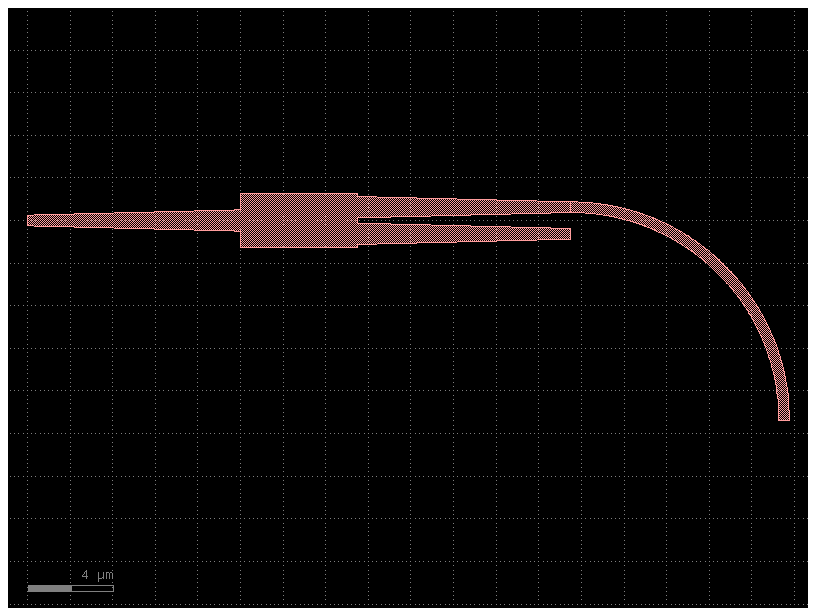

In [67]:
c = gf.Component()
mmi = c.add_ref(gf.components.mmi1x2())
bend = c.add_ref(gf.components.bend_circular())
bend.connect(
    "o1", mmi.ports["o2"], mirror=True
)  # connects follow Source -> Destination syntax
c.plot()

C:\Users\Hamed\AppData\Local\Temp\ipykernel_37412\3586718038.py:20: UserWarning: Getting `Unnamed_114_2500_1500.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_114_2500_1500.dmove` instead.
  rect.move([10, 0])  # Position the rectangle
C:\Users\Hamed\AppData\Local\Temp\ipykernel_37412\3586718038.py:24: UserWarning: Getting `circle_R3_AR2p5_L5_0_0_0.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `circle_R3_AR2p5_L5_0_0_0.dmove` instead.
  circ.move([20, 0])  # Position the circle


WindowsPath('output_layout.gds')

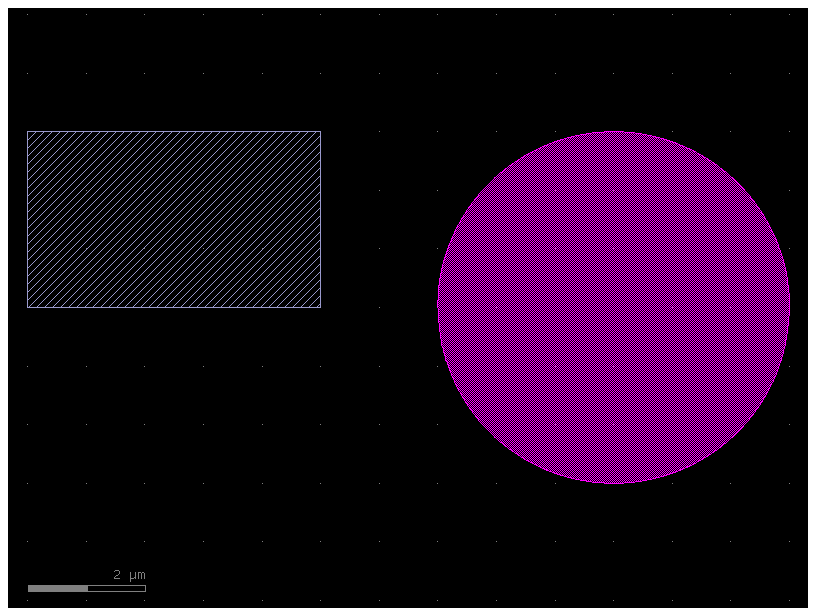

In [69]:
import gdsfactory as gf

# Function to create a circle component
def circle(radius=5, layer=(1, 0)):
    # Use the gdsfactory function to create a circle
    c = gf.components.circle(radius=radius, layer=layer)
    return c

# Create the main component
c = gf.Component()

# Add other shapes or components (rectangles, waveguides, etc.)
# Example of a rectangle addition
def rectangle(width=2, height=4, layer=(1, 0)):
    comp = gf.Component()
    comp.add_polygon([(0, 0), (width, 0), (width, height), (0, height)], layer=layer)
    return comp

rect = c << rectangle(width=5, height=3, layer=(4, 0))
rect.move([10, 0])  # Position the rectangle

# Correct way to add a circle component
circ = c << circle(radius=3, layer=(5, 0))
circ.move([20, 0])  # Position the circle

# Plot the component
c.plot()
c.show()
c.write_gds("output_layout.gds")


Write WindowsPath('e:/MSC work area/GDS factory/demo_1_0.stl') zmin = 0.000, height = 0.220


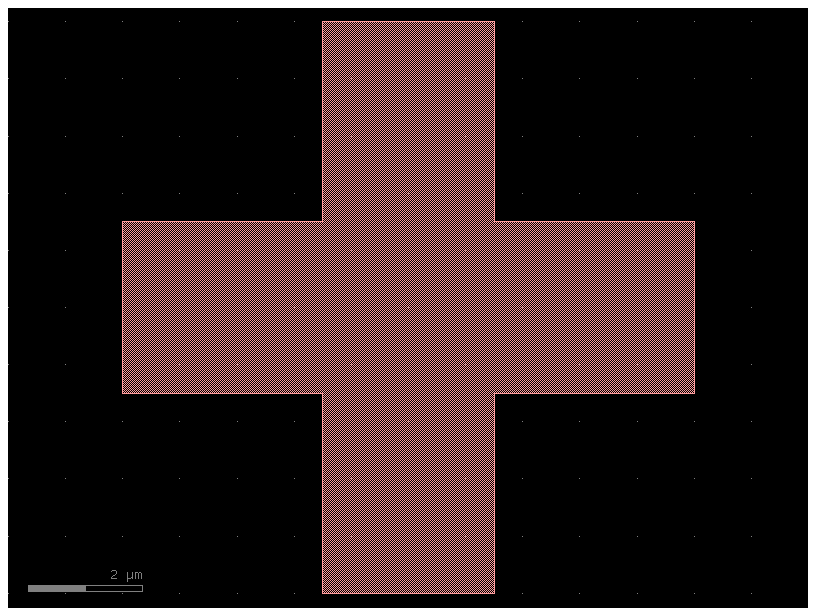

In [72]:
import gdsfactory as gf

c = gf.components.cross()
c.write_gds("demo.gds")
c.plot()
c.write("demo.oas")
gf.export.to_stl(c, "demo.stl")

In [73]:
scene = c.to_3d()
scene.show()

In [77]:
try:
    import google.colab

    is_running_on_colab = True
    !pip install gdsfactory gplugins > /dev/null

except ImportError:
    is_running_on_colab = False

    import gdsfactory as gf
from gdsfactory.component import Component
from gdsfactory.generic_tech import LAYER
from gdsfactory.typings import Float2, Layer

from gplugins.klayout.drc.write_drc import (
    check_area,
    check_density,
    check_enclosing,
    check_separation,
    check_space,
    check_width,
    write_drc_deck_macro,
)


help(write_drc_deck_macro)

rules = [
    check_width(layer="WG", value=0.2),
    check_space(layer="WG", value=0.2),
    check_width(layer="M1", value=1),
    check_width(layer="M2", value=2),
    check_space(layer="M2", value=2),
    check_separation(layer1="HEATER", layer2="M1", value=1.0),
    check_enclosing(layer1="M1", layer2="VIAC", value=0.2),
    check_area(layer="WG", min_area_um2=0.05),
    check_density(
        layer="WG", layer_floorplan="FLOORPLAN", min_density=0.5, max_density=0.6
    ),
]

drc_check_deck = write_drc_deck_macro(
    rules=rules,
    layers=LAYER,
    shortcut="Ctrl+Shift+D",
)

Help on function write_drc_deck_macro in module gplugins.klayout.drc.write_drc:

write_drc_deck_macro(rules: 'list[str]', layers: 'dict[str, Layer] | None' = None, name: 'str' = 'generic', filepath: 'PathType | None' = None, shortcut: 'str' = 'Ctrl+Shift+D', mode: 'str' = 'tiled', threads: 'int' = 4, tile_size: 'int' = 500, tile_borders: 'int | None' = None) -> 'str'
    Write KLayout DRC macro.
    
    You can customize the shortcut to run the DRC macro from the Klayout GUI.
    
    Args:
        rules: list of rules.
        layers: layer definitions can be dict or dataclass.
        name: drc rule deck name.
        filepath: Optional macro path (defaults to .klayout/drc/name.lydrc).
        shortcut: to run macro from KLayout GUI.
        mode: tiled, default or deep (hierarchical).
        threads: number of threads.
        tile_size: in um for tile mode.
        tile_borders: sides for each. Defaults None to automatic.
    
    .. code::
    
        import gdsfactory as gf
  

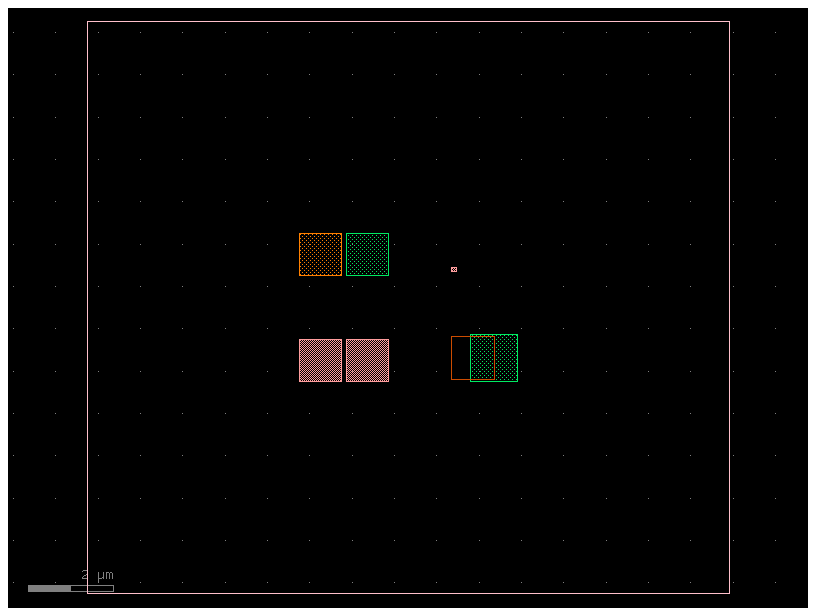

In [78]:
layer = LAYER.WG


@gf.cell
def width_min(size: Float2 = (0.1, 0.1)) -> Component:
    return gf.components.rectangle(size=size, layer=layer)


@gf.cell
def area_min() -> Component:
    size = (0.2, 0.2)
    return gf.components.rectangle(size=size, layer=layer)


@gf.cell
def gap_min(gap: float = 0.1) -> Component:
    c = gf.Component()
    r1 = c << gf.components.rectangle(size=(1, 1), layer=layer)
    r2 = c << gf.components.rectangle(size=(1, 1), layer=layer)
    r1.dxmax = 0
    r2.dxmin = gap
    return c


@gf.cell
def separation(
    gap: float = 0.1, layer1: Layer = LAYER.HEATER, layer2: Layer = LAYER.M1
) -> Component:
    c = gf.Component()
    r1 = c << gf.components.rectangle(size=(1, 1), layer=layer1)
    r2 = c << gf.components.rectangle(size=(1, 1), layer=layer2)
    r1.dxmax = 0
    r2.dxmin = gap
    return c


@gf.cell
def enclosing(
    enclosing: float = 0.1, layer1: Layer = LAYER.VIAC, layer2: Layer = LAYER.M1
) -> Component:
    """Layer1 must be enclosed by layer2 by value.

    checks if layer1 encloses (is bigger than) layer2 by value
    """
    w1 = 1
    w2 = w1 + enclosing
    c = gf.Component()
    c << gf.components.rectangle(size=(w1, w1), layer=layer1, centered=True)
    r2 = c << gf.components.rectangle(size=(w2, w2), layer=layer2, centered=True)
    r2.dmovex(0.5)
    return c


@gf.cell
def snapping_error(gap: float = 1e-3) -> Component:
    c = gf.Component()
    r1 = c << gf.components.rectangle(size=(1, 1), layer=layer)
    r2 = c << gf.components.rectangle(size=(1, 1), layer=layer)
    r1.dxmax = 0
    r2.dxmin = gap
    return c


@gf.cell
def errors() -> Component:
    components = [width_min(), gap_min(), separation(), enclosing()]
    c = gf.pack(components, spacing=1.5)
    c = gf.add_padding_container(c[0], layers=(LAYER.FLOORPLAN,), default=5)
    return c


c = errors()
c.show()  # show in klayout
c.plot()

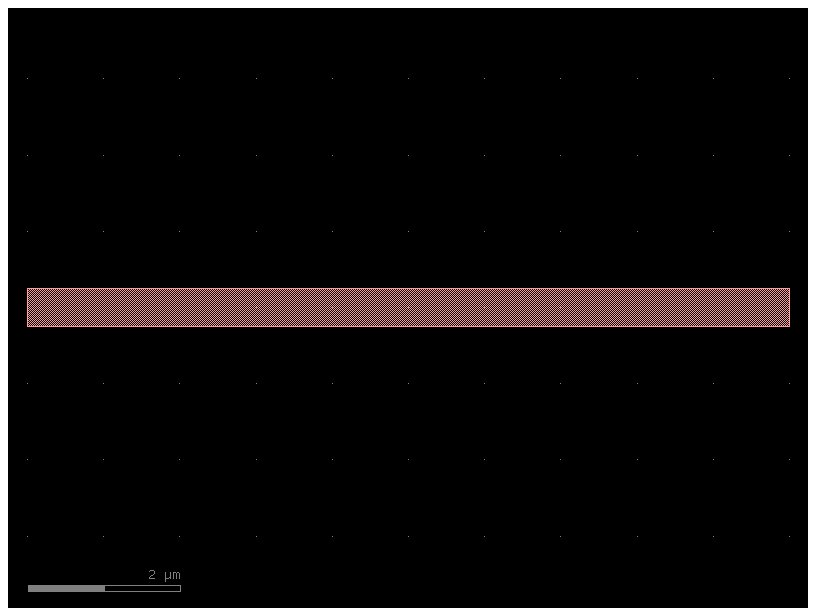

In [84]:
try:
    import google.colab

    is_running_on_colab = True
    !pip install gdsfactory gplugins[femwell] > /dev/null
    !apt install python3-gmsh gmsh > /dev/null

except ImportError:
    is_running_on_colab = False

    import matplotlib.pyplot as plt
import gdsfactory as gf
from tqdm.auto import tqdm
import numpy as np

from gdsfactory.technology import LayerStack
from gdsfactory.cross_section import rib
from gdsfactory.generic_tech import LAYER_STACK

from skfem.io.meshio import from_meshio

from femwell.maxwell.waveguide import compute_modes
from femwell.visualization import plot_domains

import sys
import logging
from rich.logging import RichHandler
import gdsfactory as gf
from gdsfactory.generic_tech import get_generic_pdk

from gplugins.gmsh import get_mesh

from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import shapely
import shapely.affinity
from scipy.constants import epsilon_0, speed_of_light
from shapely.ops import clip_by_rect
from skfem import Basis, ElementTriP0
from skfem.io.meshio import from_meshio

from femwell.maxwell.waveguide import compute_modes
from femwell.mesh import mesh_from_OrderedDict
from femwell.visualization import plot_domains

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

logger = logging.getLogger()
logger.removeHandler(sys.stderr)
logging.basicConfig(level="WARNING", datefmt="[%X]", handlers=[RichHandler()])

xs = gf.cross_section.strip(width=0.5)

c = gf.components.straight(cross_section=xs)
c

In [85]:
filtered_layer_stack = LayerStack(
    layers={
        k: LAYER_STACK.layers[k]
        for k in (
            "core",
            "clad",
            "slab90",
            "box",
        )
    }
)

In [86]:
filtered_layer_stack.layers["core"].thickness = (
    0.22  # Perturb the layer_stack before simulating
)

filtered_layer_stack.layers["slab90"].thickness = (
    0.09  # Perturb the layer_stack before simulating
)

# When selecting resolutions, the names must match the keys of the layerstack
# Here, choose a finer mesh inside and close to the core
resolutions = {
    "core": {"resolution": 0.02, "DistMax": 2, "SizeMax": 0.2},
}

In [88]:
mesh_gmsh = get_mesh(
    component=c,
    layer_stack=filtered_layer_stack,
    type="uz",  # we want a cross-section
    xsection_bounds=((1, -3), (1, 3)),  # the line from which we take a cross-section
    wafer_padding=3,  # pad simulation domain 3 microns around the component
    filename="mesh.msh",
    resolutions=resolutions,
    default_characteristic_length=0.5,
)

  0%|          | 0/3 [00:00<?, ?it/s]

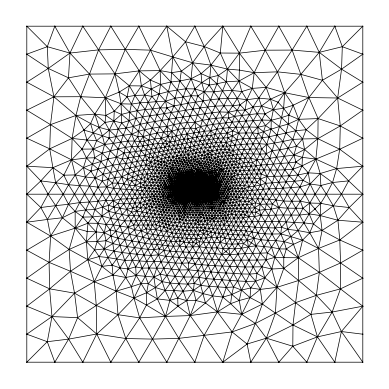

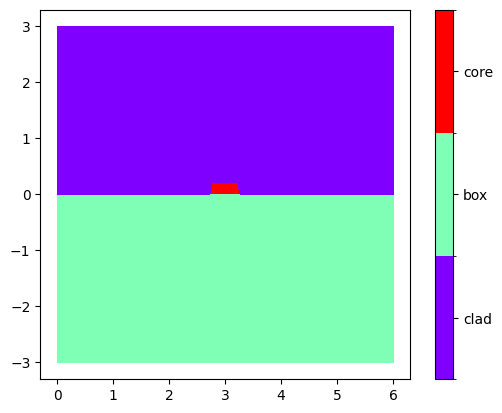

In [89]:
mesh = from_meshio(mesh_gmsh)
mesh.draw().show()

plot_domains(mesh)
plt.show()

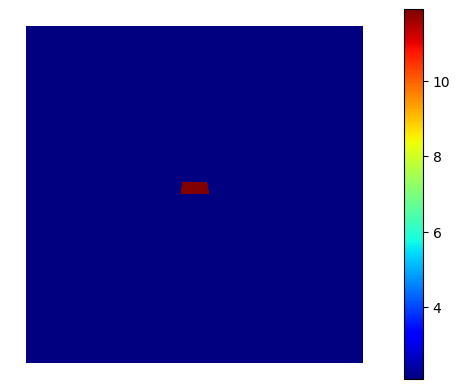

In [90]:
basis0 = Basis(mesh, ElementTriP0())
epsilon = basis0.zeros()
for subdomain, n in {"core": 3.45, "box": 1.444, "clad": 1.444}.items():
    epsilon[basis0.get_dofs(elements=subdomain)] = n**2
basis0.plot(epsilon, colorbar=True).show()

In [92]:
wavelength = 1.55
modes = compute_modes(basis0, epsilon, wavelength=wavelength, num_modes=2, order=1)

print(modes[0].te_fraction)

0.9812847993031335


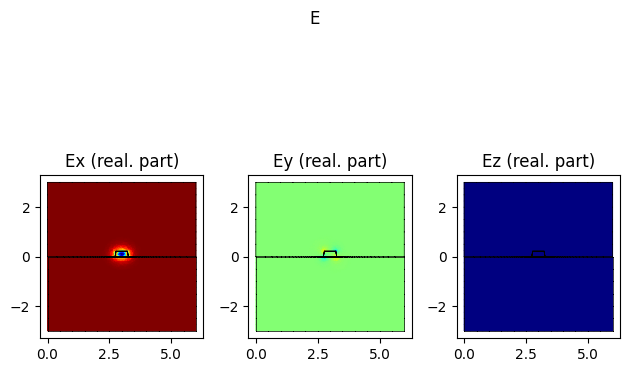

In [93]:
modes[0].show("E", part="real")

In [94]:
dir(modes[0])


[
    'E',
    'H',
    'Sx',
    'Sy',
    'Sz',
    '__annotations__',
    '__class__',
    '__dataclass_fields__',
    '__dataclass_params__',
    '__delattr__',
    '__dict__',
    '__dir__',
    '__doc__',
    '__eq__',
    '__format__',
    '__ge__',
    '__getattribute__',
    '__gt__',
    '__hash__',
    '__init__',
    '__init_subclass__',
    '__le__',
    '__lt__',
    '__match_args__',
    '__module__',
    '__ne__',
    '__new__',
    '__reduce__',
    '__reduce_ex__',
    '__repr__',
    '__setattr__',
    '__sizeof__',
    '__str__',
    '__subclasshook__',
    '__weakref__',
    'basis',
    'basis_epsilon_r',
    'calculate_confinement_factor',
    'calculate_coupling_coefficient',
    'calculate_effective_area',
    'calculate_intensity',
    'calculate_overlap',
    'calculate_pertubated_neff',
    'calculate_power',
    'calculate_propagation_loss',
    'epsilon_r',
    'frequency',
    'k',
    'k0',
    'n_eff',
    'omega',
    'plot',
    'plot_component',
   

In [95]:
modes[0].plot_component?

Signature:
modes[0].plot_component(
    field: Literal['E', 'H'],
    component: Literal['x', 'y', 'z', 'n', 't'],
    part: Union[Literal['real', 'imag', 'abs'], Callable] = 'real',
    boundaries: bool = True,
    colorbar: bool = False,
    ax: matplotlib.axes._axes.Axes = None,
)
Docstring: <no docstring>
File:      c:\users\hamed\anaconda3\envs\tidy3d_env\lib\site-packages\femwell\maxwell\waveguide.py
Type:      method

<Axes: title={'center': 'Ex (real. part)'}>

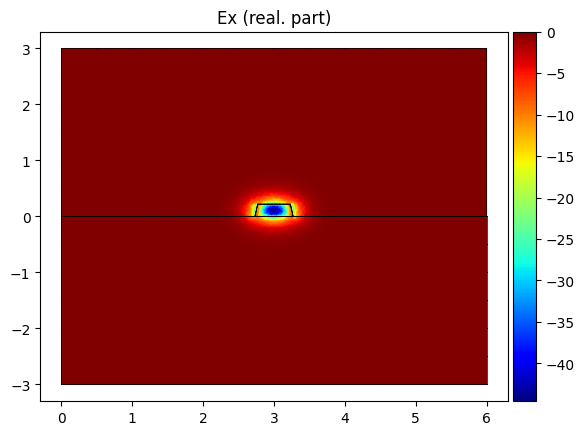

In [96]:
modes[0].plot_component("E", component="x", part="real", colorbar=True)

<Axes: title={'center': 'Ex (real. part)'}>

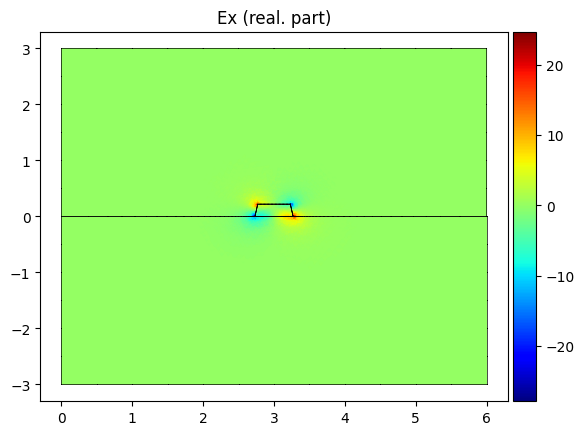

In [98]:
modes[1].plot_component("E", component="x", part="real", colorbar=True)

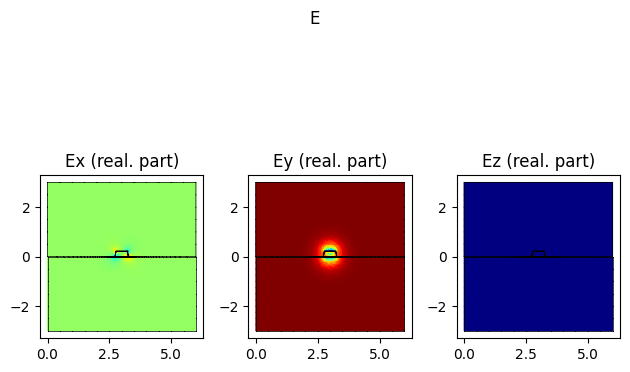

In [99]:
modes[1].show("E", part="real")

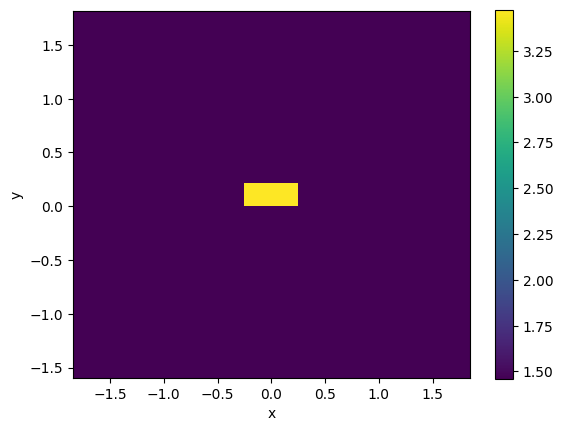

In [100]:
try:
    import google.colab

    is_running_on_colab = True
    !pip install gdsfactory gplugins[tidy3d] > /dev/null
    !apt install python3-gmsh gmsh > /dev/null

except ImportError:
    is_running_on_colab = False


import numpy as np
import gplugins.tidy3d as gt
import matplotlib.pyplot as plt
import gdsfactory as gf
from gdsfactory.generic_tech import get_generic_pdk

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

nm = 1e-3

strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=0.5,
    core_thickness=0.22,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
)
strip.plot_index()




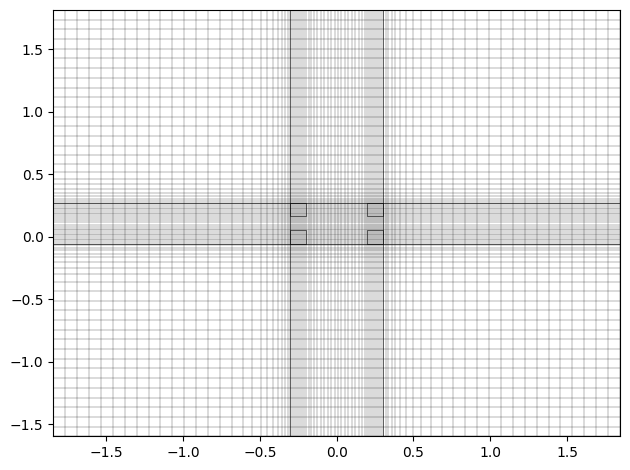

In [101]:
strip.plot_grid()

13:49:18 W. Europe Daylight Time WARNING: The group index was not computed. To  
                                 calculate group index, pass 'group_index_step =
                                 True' in the 'ModeSpec'.                       

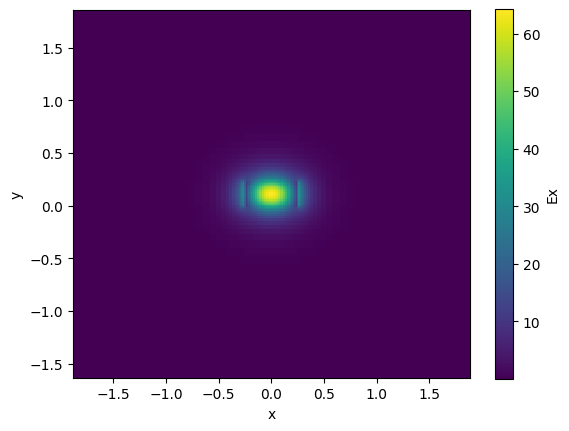

In [102]:
strip.plot_field(field_name="Ex", mode_index=0)  # TE

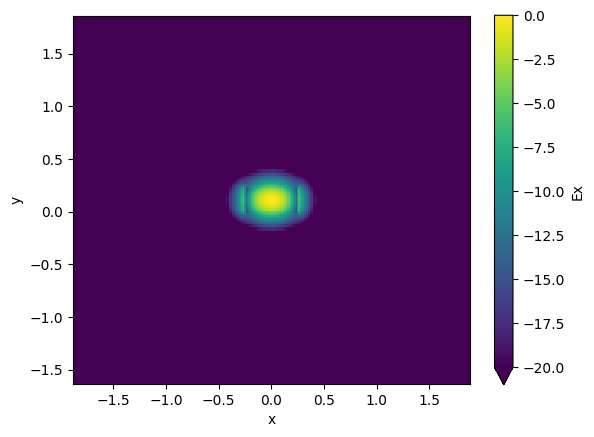

In [103]:
strip.plot_field(field_name="Ex", mode_index=0, value="dB")  # TE

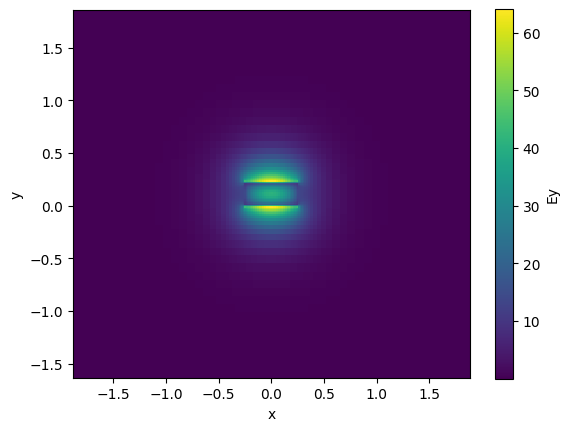

In [104]:
strip.plot_field(field_name="Ey", mode_index=1)  # TM

In [105]:
strip.n_eff

array([2.51134734+4.42777628e-05j, 1.86463643+2.09422901e-04j])

13:51:45 W. Europe Daylight Time WARNING: Mode field at frequency index 0, mode 
                                 index 1 does not decay at the plane boundaries.

array([2.67427418+3.10179974e-05j, 2.50854926+4.47861069e-05j])

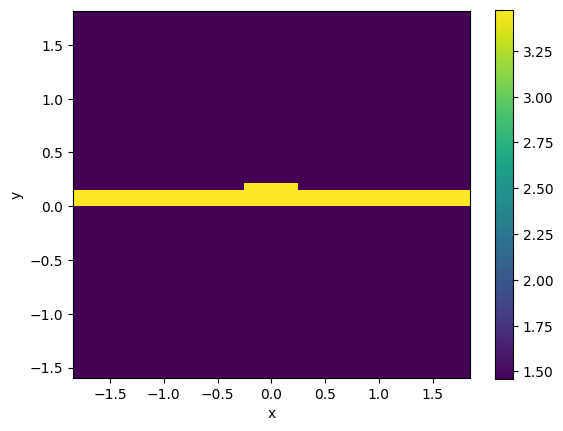

In [106]:
rib = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=0.5,
    core_thickness=0.22,
    slab_thickness=0.15,
    core_material="si",
    clad_material="sio2",
)
rib.plot_index()
rib.n_eff

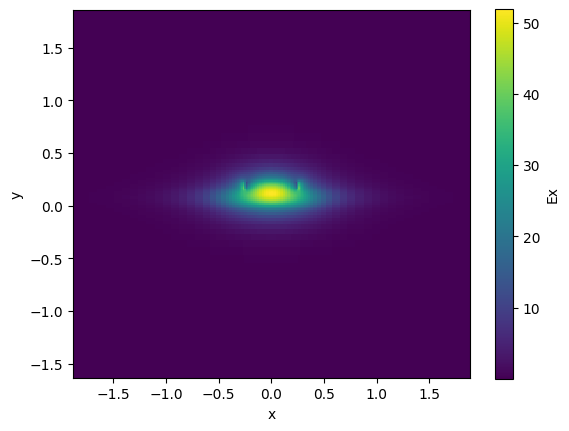

In [107]:
rib.plot_field(field_name="Ex", mode_index=0)  # TE

array([1.64461788+8.05914279e-05j, 1.57796343+1.42713228e-04j])

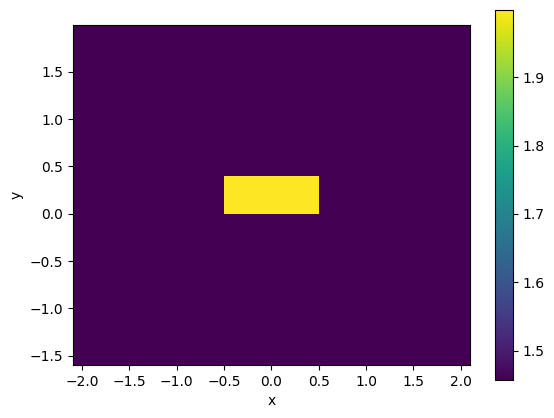

In [108]:
nitride = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1.0,
    core_thickness=400 * nm,
    slab_thickness=0.0,
    core_material="sin",
    clad_material="sio2",
)
nitride.plot_index()
nitride.n_eff

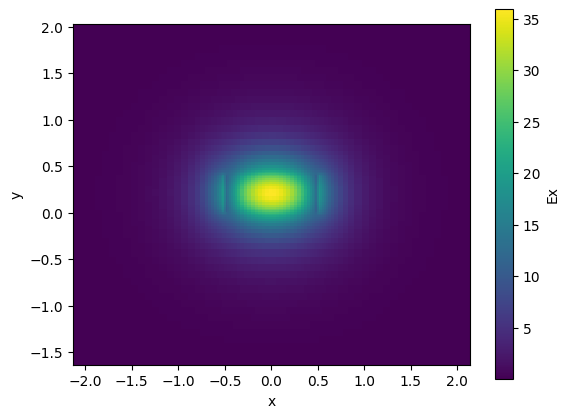

In [109]:
nitride.plot_field(field_name="Ex", mode_index=0)  # TE

  0%|          | 0/7 [00:00<?, ?it/s]

13:53:05 W. Europe Daylight Time WARNING: Mode field at frequency index 0, mode 
                                 index 3 does not decay at the plane boundaries.

13:53:07 W. Europe Daylight Time WARNING: Mode field at frequency index 0, mode 
                                 index 3 does not decay at the plane boundaries.

  0%|          | 0/7 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Effective index sweep')

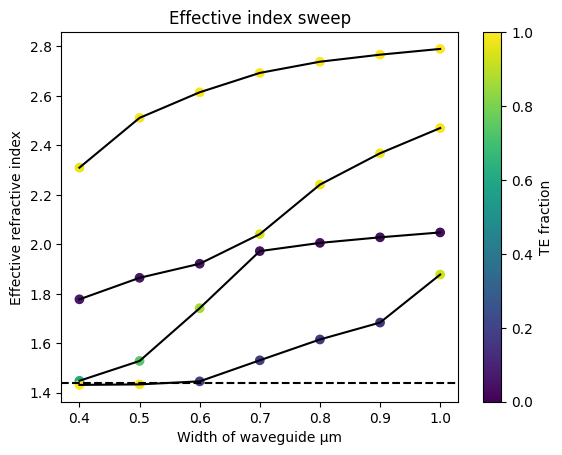

In [110]:
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1.0,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
    core_thickness=220 * nm,
    num_modes=4,
)
w = np.linspace(400 * nm, 1000 * nm, 7)
n_eff = gt.modes.sweep_n_eff(strip, core_width=w)
fraction_te = gt.modes.sweep_fraction_te(strip, core_width=w)

for i in range(4):
    plt.plot(w, n_eff.sel(mode_index=i).real, c="k")
    plt.scatter(
        w, n_eff.sel(mode_index=i).real, c=fraction_te.sel(mode_index=i), vmin=0, vmax=1
    )
plt.axhline(y=1.44, color="k", ls="--")
plt.colorbar().set_label("TE fraction")
plt.xlabel("Width of waveguide µm")
plt.ylabel("Effective refractive index")
plt.title("Effective index sweep")

In [111]:
nm = 1e-3

strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=500 * nm,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
    core_thickness=220 * nm,
    num_modes=4,
    group_index_step=10 * nm,
)
print(strip.n_group)

13:56:35 W. Europe Daylight Time WARNING: Mode field at frequency index 0, mode 
                                 index 3 does not decay at the plane boundaries.

                                 WARNING: Mode field at frequency index 1, mode 
                                 index 3 does not decay at the plane boundaries.

                                 WARNING: Mode field at frequency index 2, mode 
                                 index 3 does not decay at the plane boundaries.

[4.17803969 4.08299706 2.71577378 1.50332985]


13:57:29 W. Europe Daylight Time WARNING: Mode field at frequency index 0, mode 
                                 index 1 does not decay at the plane boundaries.

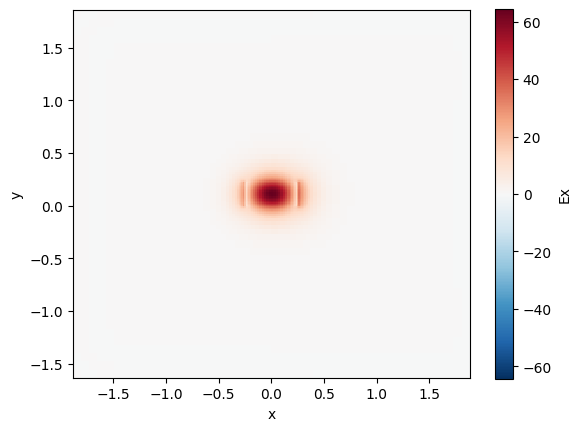

In [112]:
strip_bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=500 * nm,
    core_thickness=220 * nm,
    slab_thickness=0.0,
    bend_radius=4,
    core_material="si",
    clad_material="sio2",
)
strip_bend.plot_field(field_name="Ex", mode_index=0)  # TE

  0%|          | 0/3 [00:00<?, ?it/s]

Text(0, 0.5, 'Mismatch (dB)')

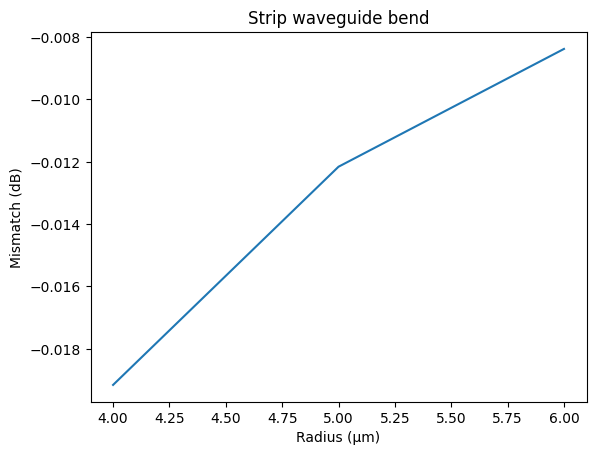

In [113]:
radii = np.arange(4, 7)
bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=500 * nm,
    core_thickness=220 * nm,
    core_material="si",
    clad_material="sio2",
    num_modes=1,
    bend_radius=radii.min(),
)
mismatch = gt.modes.sweep_bend_mismatch(bend, radii)

plt.plot(radii, 10 * np.log10(mismatch))
plt.title("Strip waveguide bend")
plt.xlabel("Radius (μm)")
plt.ylabel("Mismatch (dB)")

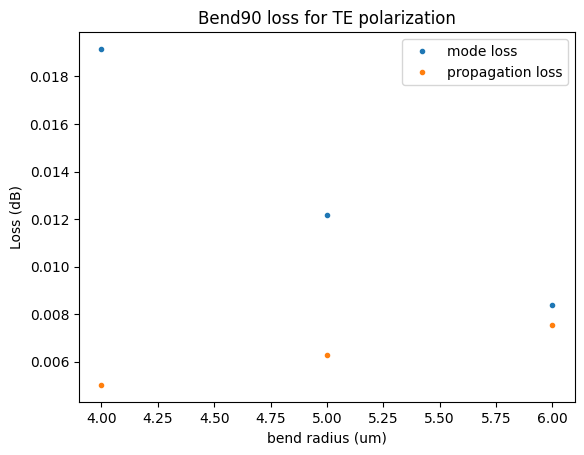

In [114]:
dB_cm = 2  # dB/cm
length = 2 * np.pi * radii * 1e-6
propagation_loss = dB_cm * length * 1e2
propagation_loss

plt.title("Bend90 loss for TE polarization")
plt.plot(radii, -10 * np.log10(mismatch), ".", label="mode loss")
plt.plot(radii, propagation_loss, ".", label="propagation loss")
plt.xlabel("bend radius (um)")
plt.ylabel("Loss (dB)")
plt.legend()

13:58:40 W. Europe Daylight Time WARNING: Mode field at frequency index 0, mode 
                                 index 1 does not decay at the plane boundaries.

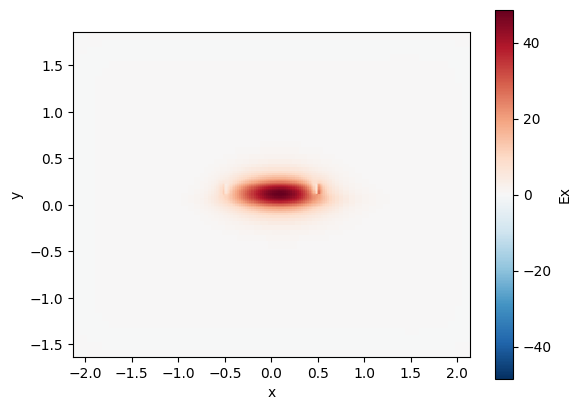

In [115]:
rib = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1000 * nm,
    core_thickness=220 * nm,
    slab_thickness=110 * nm,
    bend_radius=15,
    core_material="si",
    clad_material="sio2",
)
rib.plot_field(field_name="Ex", mode_index=0)  # TE

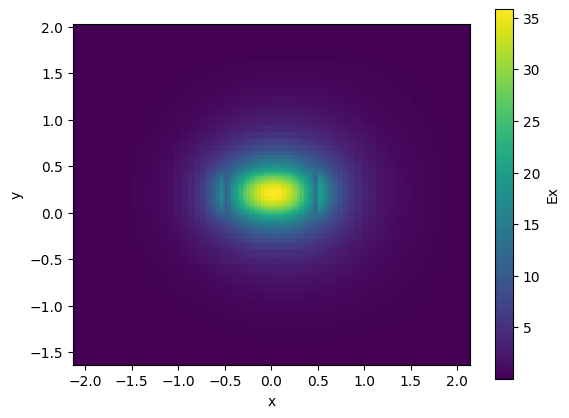

In [116]:
nitride_bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1000 * nm,
    core_thickness=400 * nm,
    slab_thickness=0.0,
    bend_radius=30,
    core_material="sin",
    clad_material="sio2",
)
nitride_bend.plot_field(field_name="Ex", mode_index=0, value="abs")  # TE

In [117]:
radii = np.array([30, 35, 40])
bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1000 * nm,
    core_thickness=400 * nm,
    core_material="sin",
    clad_material="sio2",
    num_modes=1,
    bend_radius=radii.min(),
)
mismatch = gt.modes.sweep_bend_mismatch(bend, radii)

  0%|          | 0/3 [00:00<?, ?it/s]

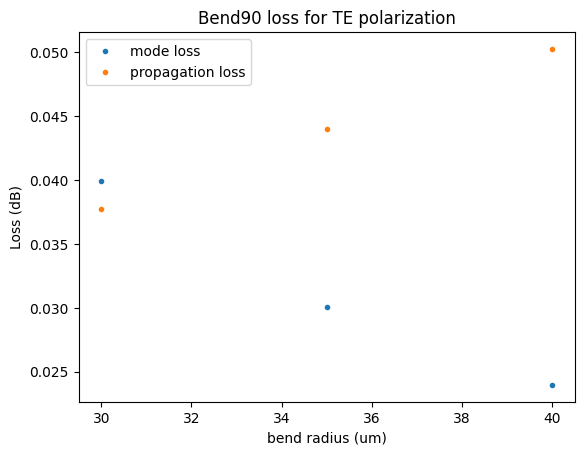

In [118]:
dB_cm = 2  # dB/cm
length = 2 * np.pi * radii * 1e-6
propagation_loss = dB_cm * length * 1e2
propagation_loss

plt.title("Bend90 loss for TE polarization")
plt.plot(radii, -10 * np.log10(mismatch), ".", label="mode loss")
plt.plot(radii, propagation_loss, ".", label="propagation loss")
plt.xlabel("bend radius (um)")
plt.ylabel("Loss (dB)")
plt.legend()

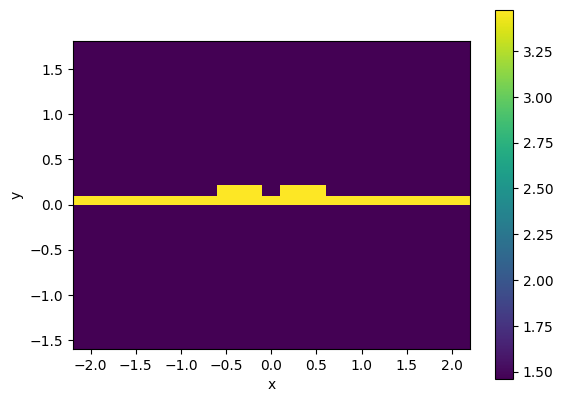

In [119]:
c = gt.modes.WaveguideCoupler(
    wavelength=1.55,
    core_width=(500 * nm, 500 * nm),
    gap=200 * nm,
    core_thickness=220 * nm,
    slab_thickness=100 * nm,
    core_material="si",
    clad_material="sio2",
)
c.plot_index()

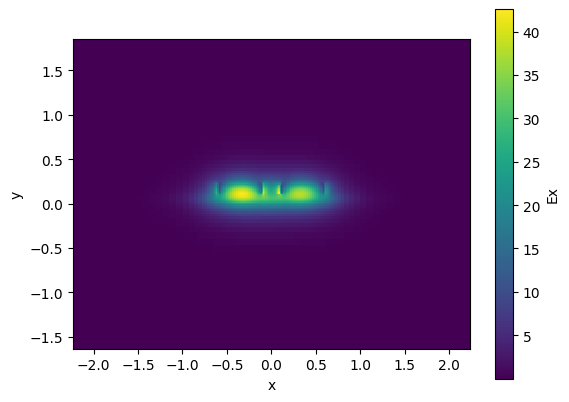

In [120]:
c.plot_field(field_name="Ex", mode_index=0)  # TE

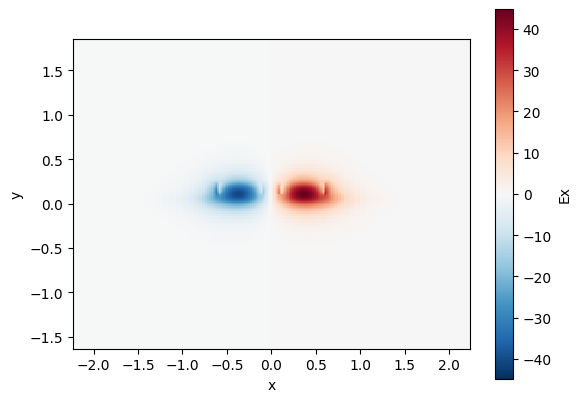

In [121]:
c.plot_field(field_name="Ex", mode_index=1)  # TE


Coupler: WaveguideCoupler(wavelength=array(1.55), core_width=['0.45', '0.45'], core_thickness='0.22', core_material='si', clad_material='sio2', box_material=None, slab_thickness='0.0', clad_thickness=None, box_thickness=None, side_margin=None, sidewall_angle='0.0', sidewall_thickness='0.0', sidewall_k='0.0', surface_thickness='0.0', surface_k='0.0', bend_radius=None, num_modes='4', group_index_step='False', precision='double', grid_resolution='20', max_grid_scaling='1.2', cache_path='C:\\Users\\Hamed\\.gdsfactory\\modes', overwrite='False', gap='0.1')
Effective indices: [2.4637647 +6.57552457e-05j 2.39007229+5.06214923e-05j
 1.9225165 +1.99036730e-04j 1.71420814+2.37015946e-04j]
Mode areas: [0.31003254 0.33258301 0.57286555 0.59002858]
Coupling length: [10.5166863   3.72044606]


  0%|          | 0/11 [00:00<?, ?it/s]

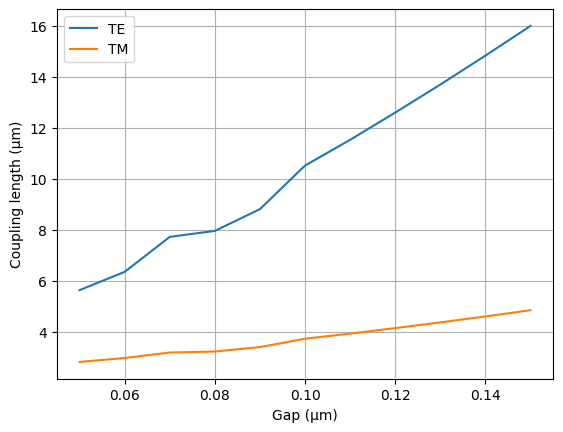

In [122]:
coupler = gt.modes.WaveguideCoupler(
    wavelength=1.55,
    core_width=(450 * nm, 450 * nm),
    core_thickness=220 * nm,
    core_material="si",
    clad_material="sio2",
    num_modes=4,
    gap=0.1,
)

print("\nCoupler:", coupler)
print("Effective indices:", coupler.n_eff)
print("Mode areas:", coupler.mode_area)
print("Coupling length:", coupler.coupling_length())

gaps = np.linspace(0.05, 0.15, 11)
lengths = gt.modes.sweep_coupling_length(coupler, gaps)

_, ax = plt.subplots(1, 1)
ax.plot(gaps, lengths)
ax.set(xlabel="Gap (μm)", ylabel="Coupling length (μm)")
ax.legend(["TE", "TM"])
ax.grid()

GDS file 'chip.gds' has been written successfully.


<IPython.core.display.HTML object>

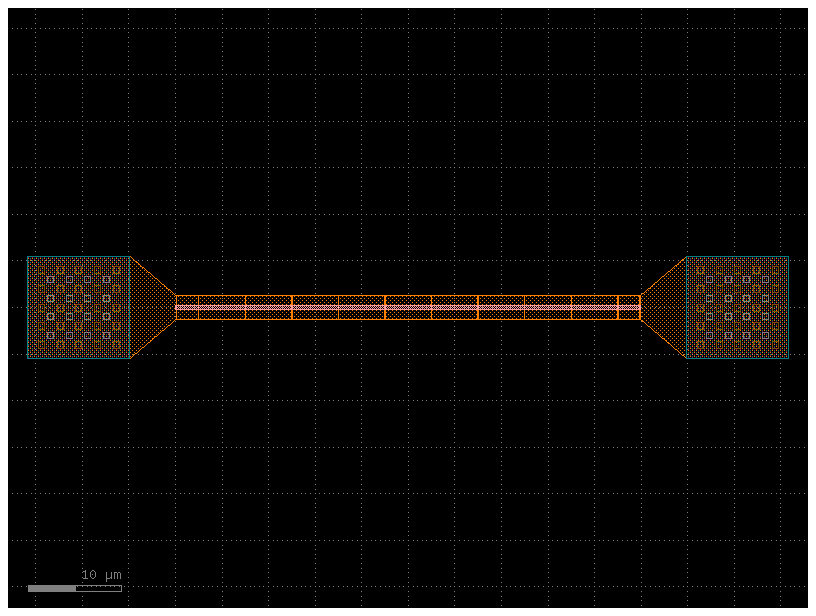

In [125]:
try:
    import google.colab

    is_running_on_colab = True
    !pip install gdsfactory gplugins[femwell] > /dev/null
    !apt install python3-gmsh gmsh > /dev/null

except ImportError:
    is_running_on_colab = False

import gdsfactory as gf
import meshio
from gdsfactory.generic_tech import get_generic_pdk
from gdsfactory.technology import LayerStack
from skfem.io import from_meshio

from gplugins.gmsh import create_physical_mesh, get_mesh

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

LAYER_STACK = PDK.layer_stack

LAYER_STACK.layers["heater"].thickness = 0.13
LAYER_STACK.layers["heater"].zmin = 2.2

heater = gf.components.straight_heater_metal(length=50)
heater.plot()

# Write the GDS file before converting to 3D
heater.write_gds('chip.gds')

print("GDS file 'chip.gds' has been written successfully.")

# Convert to 3D and show the scene
s = heater.to_3d()
s.show()


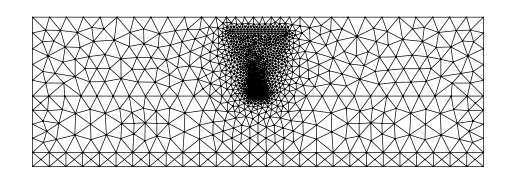

In [126]:
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString, Polygon
from skfem import Basis, ElementTriP0
from skfem.io import from_meshio
from tqdm import tqdm

from femwell.maxwell.waveguide import compute_modes
from femwell.mesh import mesh_from_OrderedDict
from femwell.thermal import solve_thermal

w_sim = 8 * 2
h_clad = 2.8
h_box = 2
w_core = 0.5
h_core = 0.22
h_heater = 0.14
w_heater = 2
offset_heater = 2 + (h_core + h_heater) / 2
h_silicon = 0.5

polygons = OrderedDict(
    bottom=LineString(
        [
            (-w_sim / 2, -h_core / 2 - h_box - h_silicon),
            (w_sim / 2, -h_core / 2 - h_box - h_silicon),
        ]
    ),
    core=Polygon(
        [
            (-w_core / 2, -h_core / 2),
            (-w_core / 2, h_core / 2),
            (w_core / 2, h_core / 2),
            (w_core / 2, -h_core / 2),
        ]
    ),
    heater=Polygon(
        [
            (-w_heater / 2, -h_heater / 2 + offset_heater),
            (-w_heater / 2, h_heater / 2 + offset_heater),
            (w_heater / 2, h_heater / 2 + offset_heater),
            (w_heater / 2, -h_heater / 2 + offset_heater),
        ]
    ),
    clad=Polygon(
        [
            (-w_sim / 2, -h_core / 2),
            (-w_sim / 2, -h_core / 2 + h_clad),
            (w_sim / 2, -h_core / 2 + h_clad),
            (w_sim / 2, -h_core / 2),
        ]
    ),
    box=Polygon(
        [
            (-w_sim / 2, -h_core / 2),
            (-w_sim / 2, -h_core / 2 - h_box),
            (w_sim / 2, -h_core / 2 - h_box),
            (w_sim / 2, -h_core / 2),
        ]
    ),
    wafer=Polygon(
        [
            (-w_sim / 2, -h_core / 2 - h_box - h_silicon),
            (-w_sim / 2, -h_core / 2 - h_box),
            (w_sim / 2, -h_core / 2 - h_box),
            (w_sim / 2, -h_core / 2 - h_box - h_silicon),
        ]
    ),
)

resolutions = dict(
    core={"resolution": 0.04, "distance": 1},
    clad={"resolution": 0.6, "distance": 1},
    box={"resolution": 0.6, "distance": 1},
    heater={"resolution": 0.1, "distance": 1},
)

mesh = from_meshio(
    mesh_from_OrderedDict(polygons, resolutions, default_resolution_max=0.6)
)
mesh.draw().show()

 90%|█████████ | 9/10 [00:01<00:00,  5.95it/s]

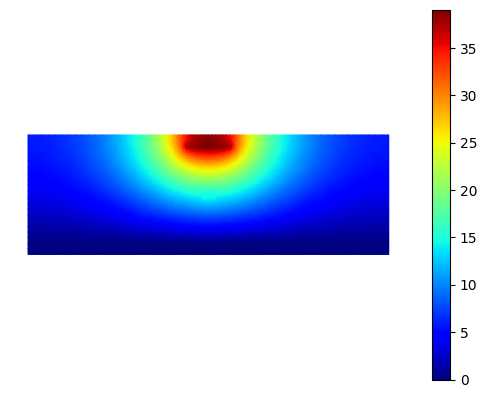

C:\Users\Hamed\AppData\Local\Temp\ipykernel_37412\1613151501.py:40: DeprecationWarning: The behavior of passing an array directly to `show` is deprecated and will be removed in the future. Use `plot` instead.
  modes[0].show(modes[0].E.real)


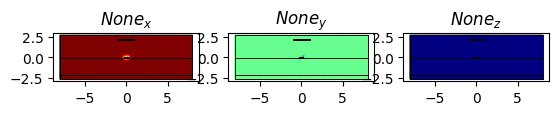

100%|██████████| 10/10 [00:02<00:00,  4.32it/s]

Phase shift: 3.7863216387822125


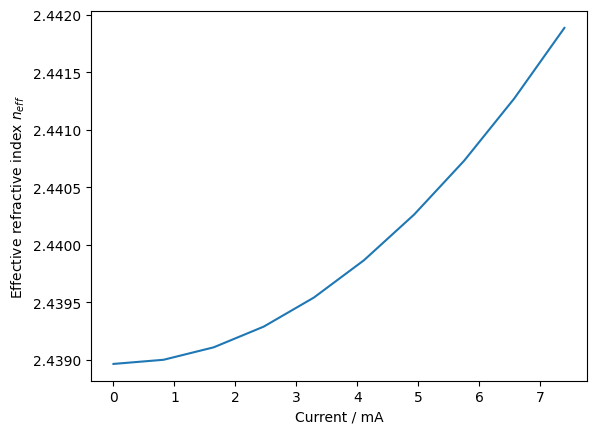

In [127]:
currents = np.linspace(0.0, 7.4e-3, 10)
current_densities = currents / polygons["heater"].area
neffs = []

for current_density in tqdm(current_densities):
    basis0 = Basis(mesh, ElementTriP0(), intorder=4)
    thermal_conductivity_p0 = basis0.zeros()
    for domain, value in {
        "core": 90,
        "box": 1.38,
        "clad": 1.38,
        "heater": 28,
        "wafer": 148,
    }.items():
        thermal_conductivity_p0[basis0.get_dofs(elements=domain)] = value
    thermal_conductivity_p0 *= 1e-12  # 1e-12 -> conversion from 1/m^2 -> 1/um^2

    basis, temperature = solve_thermal(
        basis0,
        thermal_conductivity_p0,
        specific_conductivity={"heater": 2.3e6},
        current_densities={"heater": current_density},
        fixed_boundaries={"bottom": 0},
    )

    if current_density == current_densities[-1]:
        basis.plot(temperature, shading="gouraud", colorbar=True)
        plt.show()

    temperature0 = basis0.project(basis.interpolate(temperature))
    epsilon = basis0.zeros() + (1.444 + 1.00e-5 * temperature0) ** 2
    epsilon[basis0.get_dofs(elements="core")] = (
        3.4777 + 1.86e-4 * temperature0[basis0.get_dofs(elements="core")]
    ) ** 2
    # basis0.plot(epsilon, colorbar=True).show()

    modes = compute_modes(basis0, epsilon, wavelength=1.55, num_modes=1, solver="scipy")

    if current_density == current_densities[-1]:
        modes[0].show(modes[0].E.real)

    neffs.append(np.real(modes[0].n_eff))

length = 320  # um
print(f"Phase shift: {2 * np.pi / 1.55 * (neffs[-1] - neffs[0]) * length}")
plt.xlabel("Current / mA")
plt.ylabel("Effective refractive index $n_{eff}$")
plt.plot(currents * 1e3, neffs)
plt.show()

pi_length = 1452um for 1nm width variation
pi_length = 290um for 5nm width variation
pi_length = 145um for 10nm width variation


C:\Users\Hamed\AppData\Local\Temp\ipykernel_37412\3135957960.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


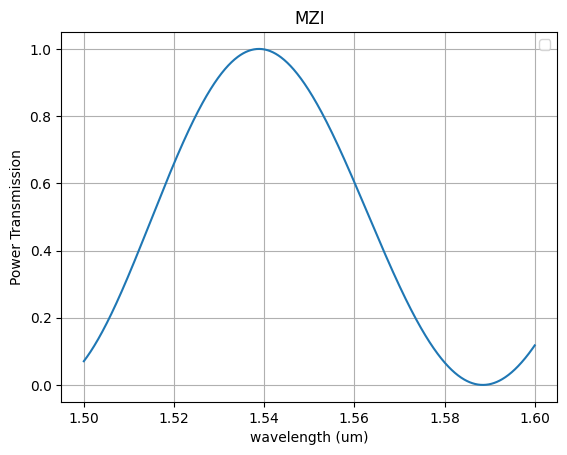

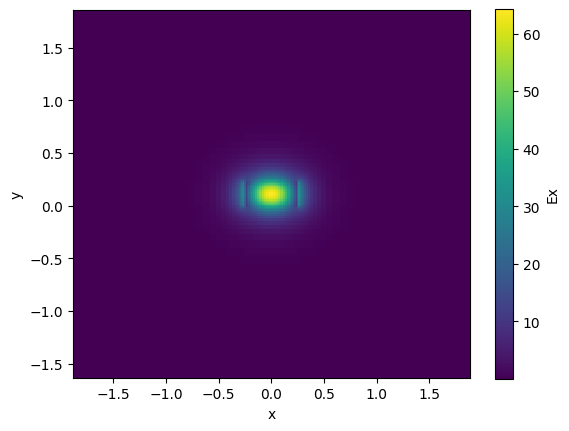

In [129]:
try:
    import google.colab

    is_running_on_colab = True
    !pip install gdsfactory gplugins[tidy3d,sax] > /dev/null
    !apt install python3-gmsh gmsh > /dev/null

except ImportError:
    is_running_on_colab = False


from typing import Optional

import numpy as np
import gdsfactory as gf
from gdsfactory.generic_tech import get_generic_pdk

def mzi(
    wl: np.ndarray,
    neff: Optional[float],
    neff1: Optional[float] = None,
    neff2: Optional[float] = None,
    delta_length: Optional[float] = None,
    length1: Optional[float] = 0,
    length2: Optional[float] = None,
) -> np.ndarray:
    """Returns Frequency Domain Response of an MZI interferometer in linear units.

    Args:
        wl: wavelength in  um.
        neff: effective index.
        neff1: effective index branch 1.
        neff2: effective index branch 2.
        delta_length: length difference L2-L1.
        length1: length of branch 1.
        length2: length of branch 2.
    """
    k_0 = 2 * np.pi / wl
    length2 = length2 or length1 + delta_length
    delta_length = delta_length or np.abs(length2 - length1)
    neff1 = neff1 or neff
    neff2 = neff2 or neff

    E_out = 0.5 * (
        np.exp(1j * k_0 * neff1 * (length1 + delta_length))
        + np.exp(1j * k_0 * neff2 * length1)
    )
    return np.abs(E_out) ** 2


if __name__ == "__main__":
    import gplugins.tidy3d as gt
    import matplotlib.pyplot as plt

    nm = 1e-3
    strip = gt.modes.Waveguide(
        wavelength=1.55,
        core_width=500 * nm,
        core_thickness=220 * nm,
        slab_thickness=0.0,
        core_material="si",
        clad_material="sio2",
    )

    neff = 2.46  # Effective index of the waveguides
    wl0 = 1.55  # [μm] the wavelength at which neff and ng are defined
    wl = np.linspace(1.5, 1.6, 1000)  # [μm] Wavelengths to sweep over
    ngs = [4.182551, 4.169563, 4.172917]
    thicknesses = [210, 220, 230]

    length = 4e3
    dn = np.pi / length

    polyfit_TE1550SOI_220nm = np.array(
        [
            1.02478963e-09,
            -8.65556534e-08,
            3.32415694e-06,
            -7.68408985e-05,
            1.19282177e-03,
            -1.31366332e-02,
            1.05721429e-01,
            -6.31057637e-01,
            2.80689677e00,
            -9.26867694e00,
            2.24535191e01,
            -3.90664800e01,
            4.71899278e01,
            -3.74726005e01,
            1.77381560e01,
            -1.12666286e00,
        ]
    )
    neff_w = lambda w: np.poly1d(polyfit_TE1550SOI_220nm)(w)

    w0 = 450 * nm
    dn1 = neff_w(w0 + 1 * nm / 2) - neff_w(w0 - 1 * nm / 2)
    dn5 = neff_w(w0 + 5 * nm / 2) - neff_w(w0 - 5 * nm / 2)
    dn10 = neff_w(w0 + 10 * nm / 2) - neff_w(w0 - 10 * nm / 2)

    pi_length1 = np.pi / dn1
    pi_length5 = np.pi / dn5
    pi_length10 = np.pi / dn10

    print(f"pi_length = {pi_length1:.0f}um for 1nm width variation")
    print(f"pi_length = {pi_length5:.0f}um for 5nm width variation")
    print(f"pi_length = {pi_length10:.0f}um for 10nm width variation")

    dn = dn1
    p = mzi(wl, neff=neff, neff1=neff + dn, neff2=neff + dn, delta_length=10)
    plt.plot(wl, p)
    plt.title("MZI")
    plt.xlabel("wavelength (um)")
    plt.ylabel("Power Transmission")
    plt.grid()
    plt.legend()
    plt.show()


import numpy as np
import gplugins.tidy3d as gt
import matplotlib.pyplot as plt

nm = 1e-3
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=0.5,
    core_thickness=0.22,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
    group_index_step=10 * nm,
)
strip.plot_field(field_name="Ex", mode_index=0)  # TE

In [130]:
ng = strip.n_group[0]
ng

4.178039693572358

14:21:35 W. Europe Daylight Time WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

Output()

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

14:21:36 W. Europe Daylight Time ERROR: The name already exists.                

14:21:38 W. Europe Daylight Time Started working on Batch containing 3 tasks.

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

14:21:49 W. Europe Daylight Time Maximum FlexCredit cost: 3.187 for the whole   
                                 batch.

                                 Use 'Batch.real_cost()' to get the billed      
                                 FlexCredit cost after the Batch has completed.

Output()

14:29:45 W. Europe Daylight Time Batch complete.

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

Output()

14:29:48 W. Europe Daylight Time WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

14:29:49 W. Europe Daylight Time WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

14:29:50 W. Europe Daylight Time WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

                                 WARNING: 'simulation.structures[0]' is outside 
                                 of the simulation domain.                      

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

Simulation saved to WindowsPath('mmi1x2.npz')


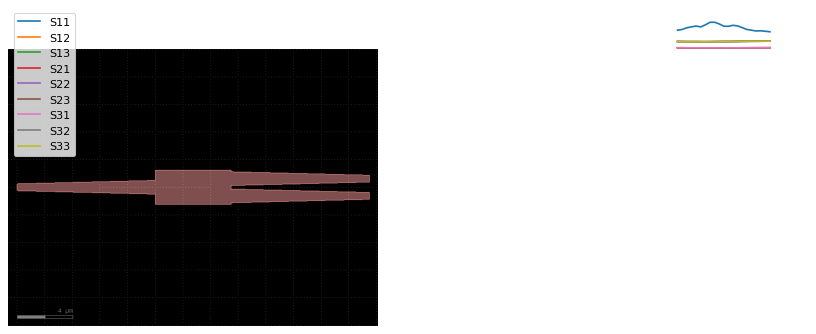

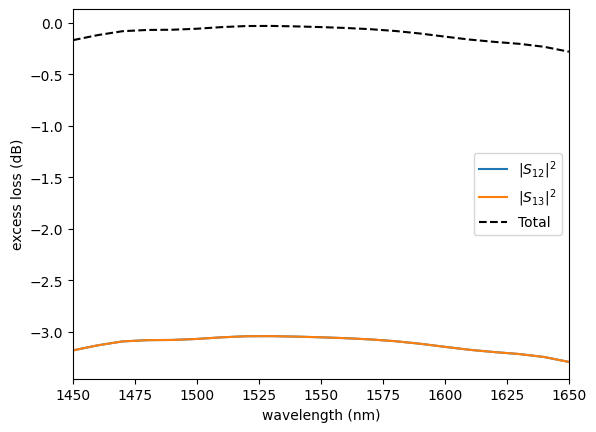

In [132]:
import gplugins as sim
import gdsfactory as gf
import gplugins.tidy3d as gt
import gdsfactory.components as pdk
from gdsfactory.config import PATH
c = pdk.mmi1x2()
c.plot()
sp = gt.write_sparameters(c, filepath="./mmi1x2.npz")

sim.plot.plot_sparameters(sp)
sim.plot.plot_loss1x2(sp)

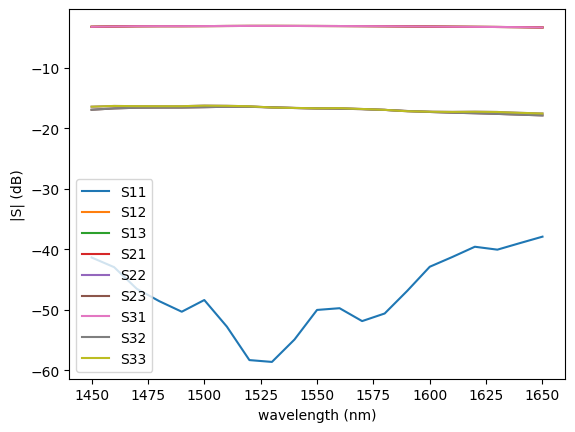

In [133]:
sim.plot.plot_sparameters(sp)

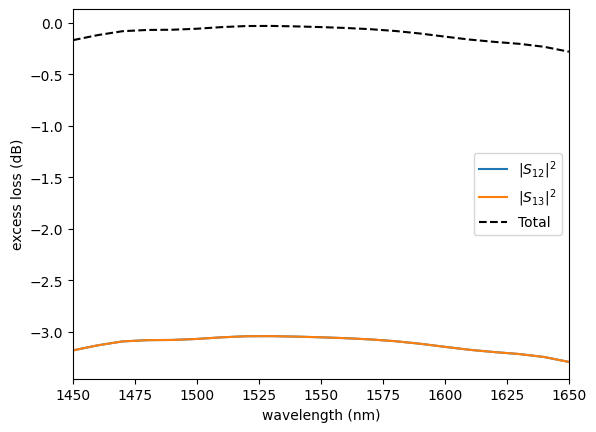

In [134]:
sim.plot.plot_loss1x2(sp)

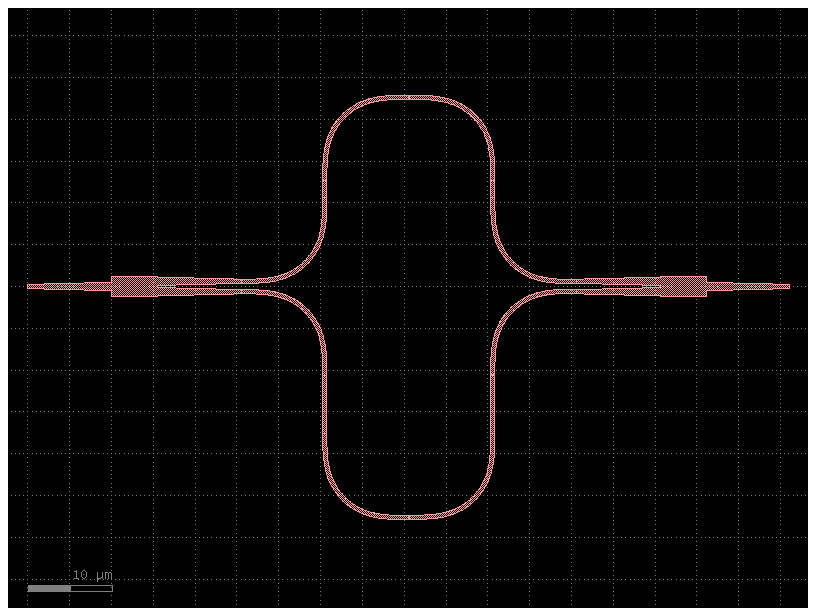

In [135]:
mzi10 = gf.components.mzi(splitter=c, delta_length=10)
mzi10.plot()

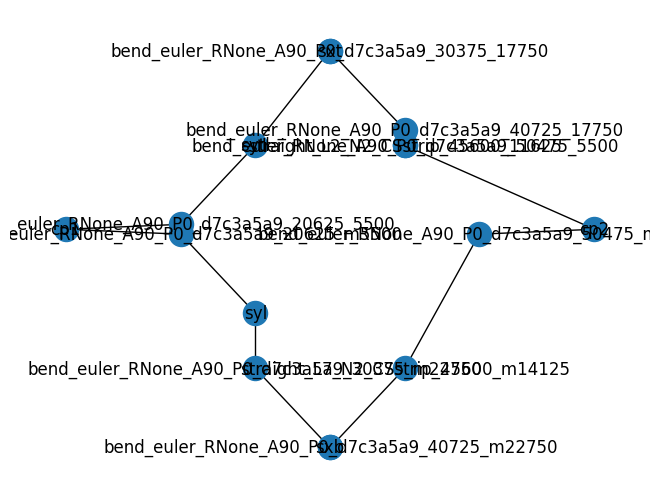

In [136]:
mzi10.plot_netlist()

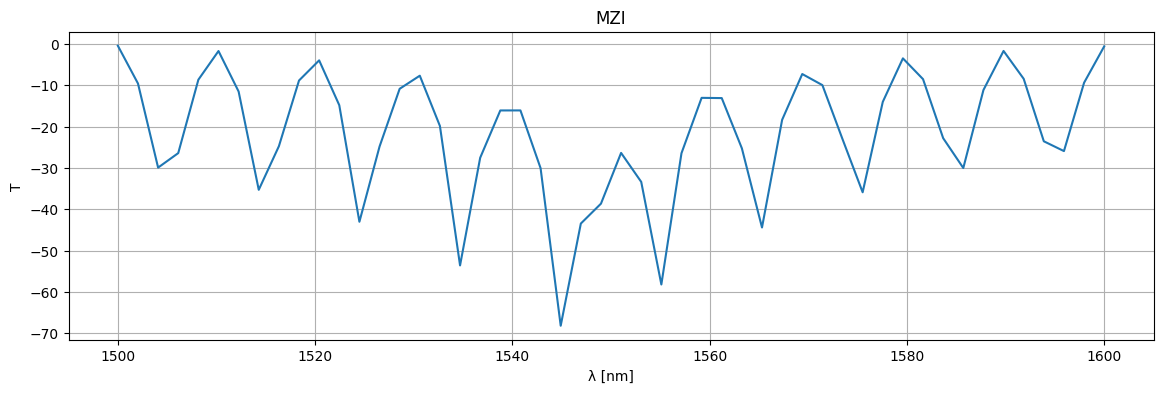

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import sax

import gdsfactory as gf
import gplugins.sax as gsax

def straight(wl=1.5, length=10.0, neff=2.4) -> sax.SDict:
    wl0 = 1.5  # center wavelength for which the waveguide model is defined
    return sax.reciprocal({("o1", "o2"): jnp.exp(2j * jnp.pi * neff * length / wl)})


def bend_euler(wl=1.5, length=20.0):
    """Assumes a reduced transmission for the euler bend compared to a straight"""
    return {k: 0.99 * v for k, v in straight(wl=wl, length=length).items()}


mmi1x2 = gsax.read.model_from_npz(sp)
models = {
    "bend_euler": bend_euler,
    "mmi1x2": mmi1x2,
    "straight": straight,
}
netlist = mzi10.get_netlist()
circuit, _ = sax.circuit(netlist=netlist, models=models)

wl = np.linspace(1.5, 1.6)
S = circuit(wl=wl)
plt.figure(figsize=(14, 4))
plt.title("MZI")
plt.plot(1e3 * wl, 10 * np.log10(jnp.abs(S["o1", "o2"]) ** 2))
plt.xlabel("λ [nm]")
plt.ylabel("T")
plt.grid(True)
plt.show()





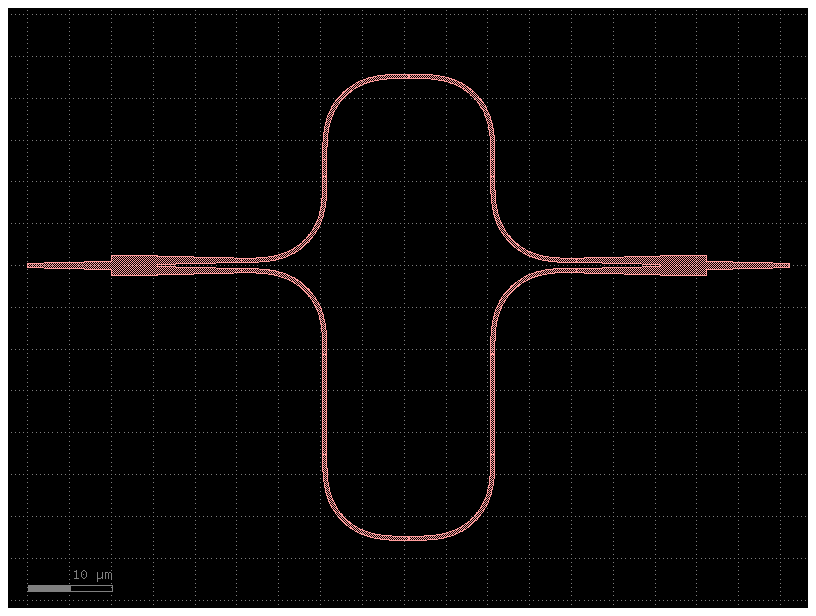

In [139]:
mzi20 = gf.components.mzi(splitter=c, delta_length=20)
mzi20.plot()

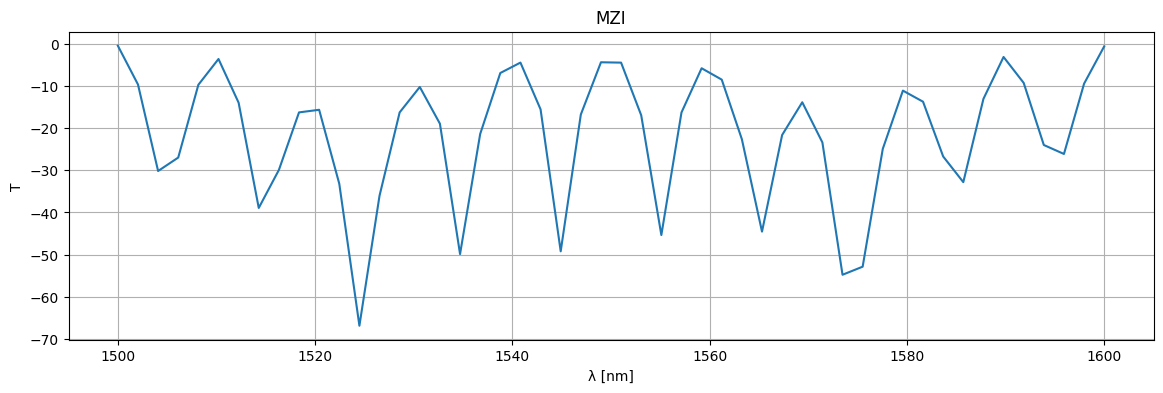

In [140]:
netlist = mzi20.get_netlist()
circuit, _ = sax.circuit(netlist=netlist, models=models)

wl = np.linspace(1.5, 1.6)
S = circuit(wl=wl)
plt.figure(figsize=(14, 4))
plt.title("MZI")
plt.plot(1e3 * wl, 10 * np.log10(jnp.abs(S["o1", "o2"]) ** 2))
plt.xlabel("λ [nm]")
plt.ylabel("T")
plt.grid(True)
plt.show()

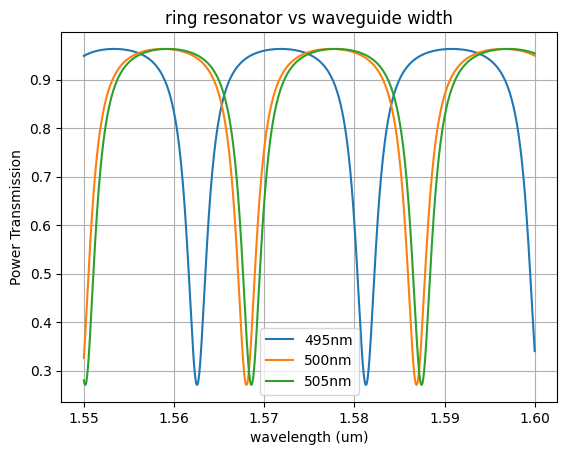

In [142]:
try:
    import google.colab

    is_running_on_colab = True
    !pip install gdsfactory gplugins[tidy3d,sax] > /dev/null
    !apt install python3-gmsh gmsh > /dev/null

except ImportError:
    is_running_on_colab = False


import numpy as np
import gdsfactory as gf


def ring(
    wl: np.ndarray,
    wl0: float,
    neff: float,
    ng: float,
    ring_length: float,
    coupling: float,
    loss: float,
) -> np.ndarray:
    """Returns Frequency Domain Response of an all pass filter.

    Args:
        wl: wavelength in  um.
        wl0: center wavelength at which neff and ng are defined.
        neff: effective index.
        ng: group index.
        ring_length: in um.
        coupling: coupling coefficient.
        loss: dB/um.
    """
    transmission = 1 - coupling
    neff_wl = (
        neff + (wl0 - wl) * (ng - neff) / wl0
    )  # we expect a linear behavior with respect to wavelength
    out = np.sqrt(transmission) - 10 ** (-loss * ring_length / 20.0) * np.exp(
        2j * np.pi * neff_wl * ring_length / wl
    )
    out /= 1 - np.sqrt(transmission) * 10 ** (-loss * ring_length / 20.0) * np.exp(
        2j * np.pi * neff_wl * ring_length / wl
    )
    return abs(out) ** 2


if __name__ == "__main__":
    import matplotlib.pyplot as plt

    loss = 0.03  # [dB/μm] (alpha) waveguide loss
    neff = 2.46  # Effective index of the waveguides
    wl0 = 1.55  # [μm] the wavelength at which neff and ng are defined
    radius = 5
    ring_length = 2 * np.pi * radius  # [μm] Length of the ring
    coupling = 0.5  # [] coupling of the coupler
    wl = np.linspace(1.5, 1.6, 1000)  # [μm] Wavelengths to sweep over
    wl = np.linspace(1.55, 1.60, 1000)  # [μm] Wavelengths to sweep over
    ngs = [4.182551, 4.169563, 4.172917]
    thicknesses = [210, 220, 230]

    # widths = np.array([0.4, 0.45, 0.5, 0.55, 0.6])
    # ngs = np.array([4.38215238, 4.27254985, 4.16956338, 4.13283219, 4.05791982])

    widths = np.array([0.495, 0.5, 0.505])
    neffs = np.array([2.40197253, 2.46586378, 2.46731758])
    ng = 4.2  # Group index of the waveguides

    for width, neff in zip(widths, neffs):
        p = ring(
            wl=wl,
            wl0=wl0,
            neff=neff,
            ng=ng,
            ring_length=ring_length,
            coupling=coupling,
            loss=loss,
        )
        plt.plot(wl, p, label=f"{int(width*1e3)}nm")

    plt.title("ring resonator vs waveguide width")
    plt.xlabel("wavelength (um)")
    plt.ylabel("Power Transmission")
    plt.grid()
    plt.legend()
    plt.show()

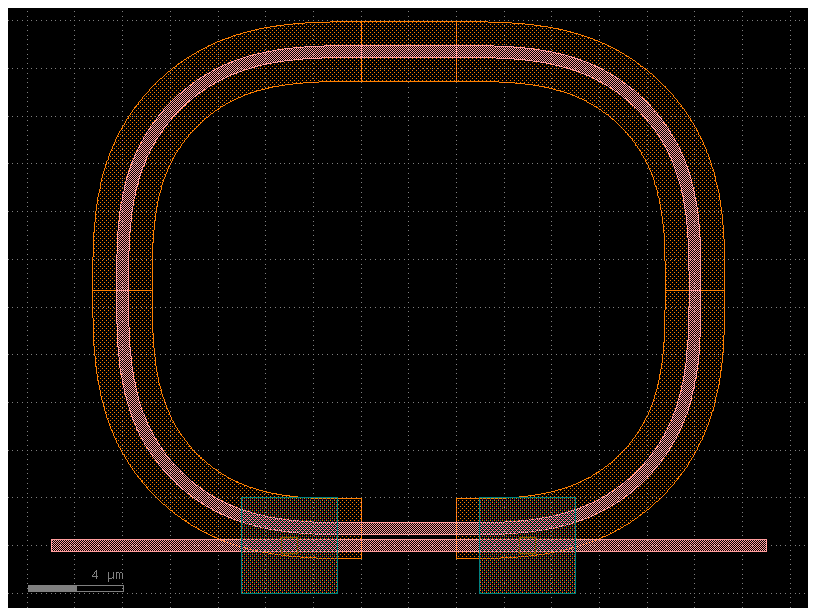

In [143]:
from typing import Optional

import toolz

from gdsfactory.component import Component
from gdsfactory.components.bend_euler import bend_euler
from gdsfactory.components.coupler90 import coupler90 as coupler90function
from gdsfactory.components.coupler_straight import (
    coupler_straight as coupler_straight_function,
)
from gdsfactory.components.straight import straight
from gdsfactory.cross_section import strip
from gdsfactory.snap import assert_on_2nm_grid
from gdsfactory.typings import ComponentSpec, CrossSectionSpec

import gdsfactory as gf

c = gf.components.ring_single_heater(gap=0.2, radius=10, length_x=4)
c.plot()




In [144]:
scene = c.to_3d()
scene.show()

<IPython.core.display.HTML object>

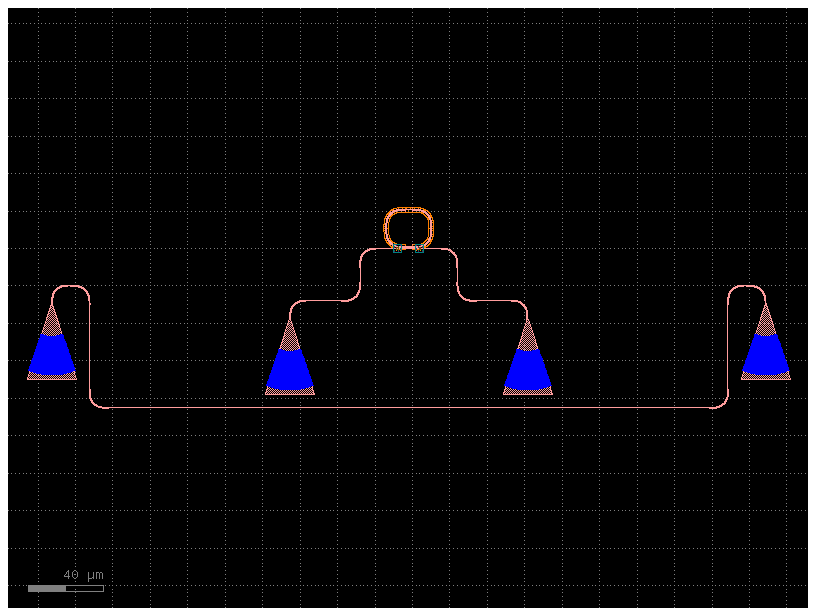

In [145]:
ring = gf.components.ring_single_heater(
    gap=0.2, radius=10, length_x=4, via_stack_offset=(2, 0)
)
ring_with_grating_couplers = gf.routing.add_fiber_array(ring)
ring_with_grating_couplers.plot()

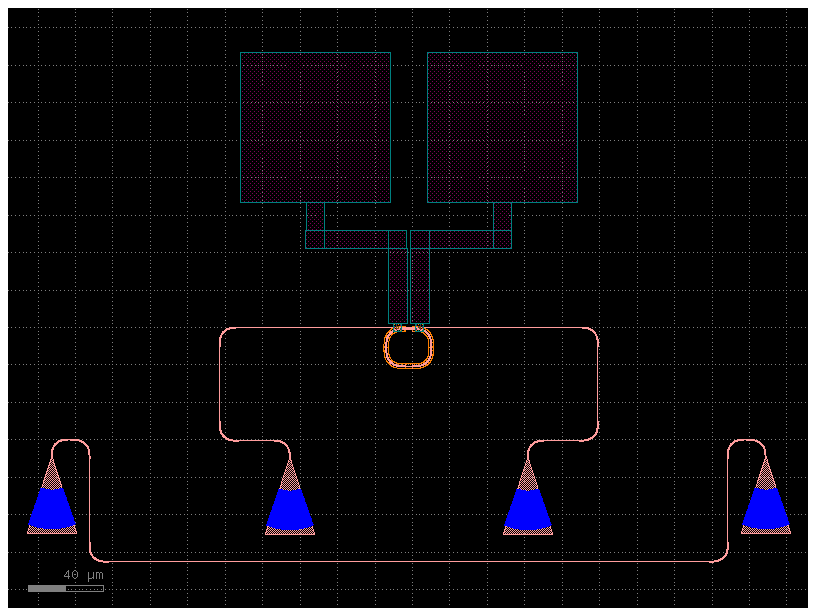

In [146]:
port_names = ["l_e1", "r_e3"]
port_names = ["l_e4", "r_e4"]
c = gf.routing.add_pads_top(
    ring,
    port_names=port_names,
)
c = gf.routing.add_fiber_array(c)
c

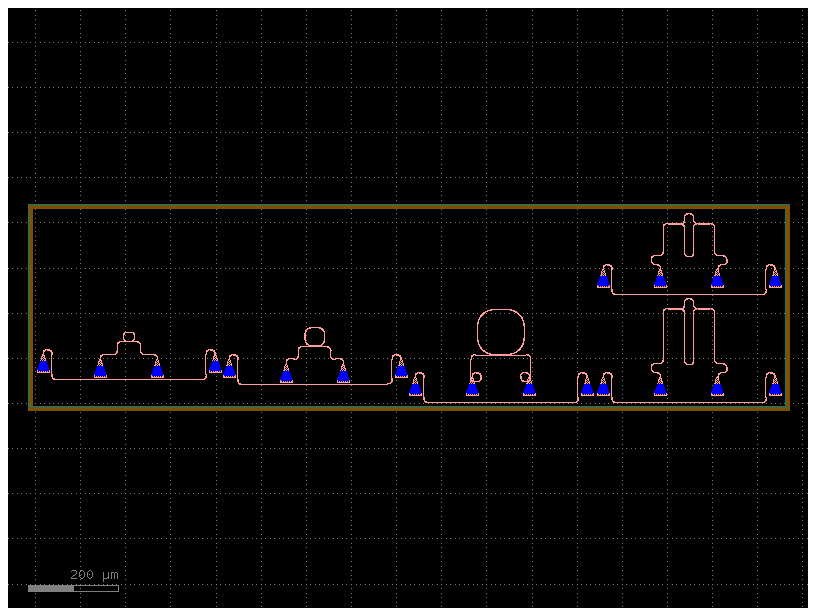

In [147]:
nm = 1e-3
ring_te = toolz.compose(gf.routing.add_fiber_array, gf.components.ring_single)
rings_te = []

for radius in [10, 20, 50]:
    ring = gf.c.ring_single(radius=radius)
    ring_te = gf.routing.add_fiber_array(ring)
    ring_te.name = f"ring_{radius}"
    rings_te.append(ring_te)

rings = gf.grid(rings_te)


@gf.cell
def reticle(size=(1000, 1000)):
    c = gf.Component()
    r = c << rings
    m = c << gf.components.pack_doe(
        gf.components.mzi,
        settings=dict(delta_length=[100, 200]),
        function=gf.routing.add_fiber_array,
    )
    m.dxmin = r.dxmax + 10
    m.dymin = r.dymin
    c << gf.components.seal_ring(c)
    return c


m = reticle()
m

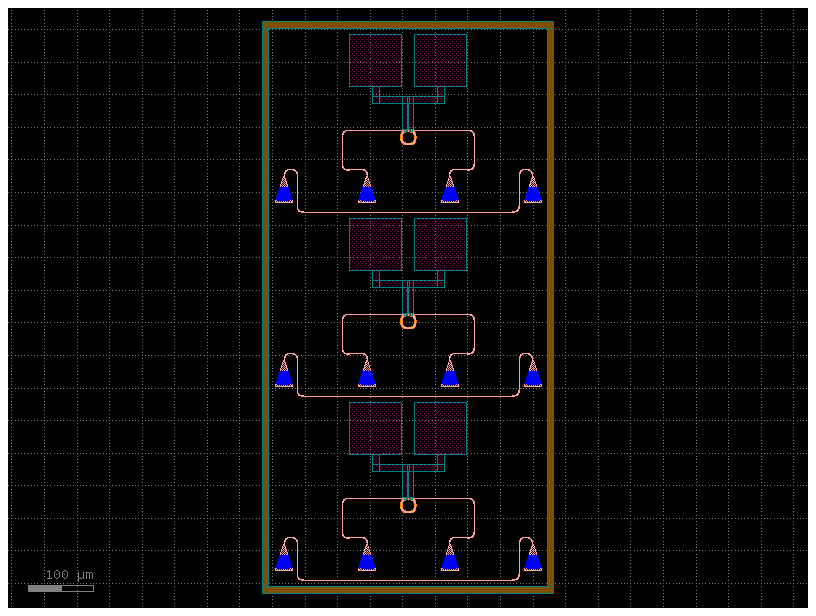

In [148]:
nm = 1e-3
ring_te = toolz.compose(gf.routing.add_fiber_array, gf.components.ring_single)
gaps = [210 * nm, 220 * nm, 230 * nm]
rings = []
port_names = ["l_e4", "r_e4"]

for gap in gaps:
    ring = gf.c.ring_single_heater(gap=gap)
    ring_pads = gf.routing.add_pads_top(ring, port_names=port_names)
    ring_te = gf.routing.add_fiber_array(ring_pads)
    ring_te.name = f"ring_{gap}"
    rings.append(ring_te)


def reticle(size=(1000, 1000)):
    c = gf.Component()
    p = c << gf.pack(rings)[0]
    c.add_ports(p.ports)
    c << gf.components.seal_ring(c)
    return c


m = reticle()
m

In [149]:
gdspath = m.write_gds(gdspath="mask.gds")

In [150]:
m.pprint_ports()

┏━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ name        ┃ width ┃ orientation ┃ layer ┃ center                       ┃ port_type   ┃
┡━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ 0_v1        │ 10.0  │ 270.0       │ WG    │ (145.02, 33.67)              │ vertical_te │
│ 0_v2        │ 10.0  │ 270.0       │ WG    │ (272.02, 33.67)              │ vertical_te │
│ 0_e1        │ 80.0  │ 270.0       │ M3    │ (158.52, 197.38)             │ electrical  │
│ 0_e2        │ 80.0  │ 270.0       │ M3    │ (258.52, 197.38)             │ electrical  │
│ 0_l_e1      │ 4.0   │ 180.0       │ M3    │ (203.02, 130.38)             │ electrical  │
│ 0_l_e2      │ 4.0   │ 270.0       │ M3    │ (205.02, 128.38)             │ electrical  │
│ 0_l_e3      │ 4.0   │ 0.0         │ M3    │ (207.02, 130.38)             │ electrical  │
│ 0_r_e1      │ 4.0   │ 180.0       │ M3    │ (210.02, 130.38)             │ electrical  │
│ 0_r_e2      │ 4.0   │ 270.0       │ M3    │ (212.02, 128.38)             │ electrical  │
│ 0_r_e3      │ 4.0   │ 0.0         │ M3    │ (214.02, 130.38)             │ electrical  │
│ 0_loopback1 │ 10.0  │ 270.0       │ WG    │ (18.02, 34.111000000000004)  │ vertical_te │
│ 0_loopback2 │ 10.0  │ 270.0       │ WG    │ (399.02, 34.111000000000004) │ vertical_te │
│ 1_v1        │ 10.0  │ 270.0       │ WG    │ (145.02, 315.991)            │ vertical_te │
│ 1_v2        │ 10.0  │ 270.0       │ WG    │ (272.02, 315.991)            │ vertical_te │
│ 1_e1        │ 80.0  │ 270.0       │ M3    │ (158.52, 479.711)            │ electrical  │
│ 1_e2        │ 80.0  │ 270.0       │ M3    │ (258.52, 479.711)            │ electrical  │
│ 1_l_e1      │ 4.0   │ 180.0       │ M3    │ (203.02, 412.711)            │ electrical  │
│ 1_l_e2      │ 4.0   │ 270.0       │ M3    │ (205.02, 410.711)            │ electrical  │
│ 1_l_e3      │ 4.0   │ 0.0         │ M3    │ (207.02, 412.711)            │ electrical  │
│ 1_r_e1      │ 4.0   │ 180.0       │ M3    │ (210.02, 412.711)            │ electrical  │
│ 1_r_e2      │ 4.0   │ 270.0       │ M3    │ (212.02, 410.711)            │ electrical  │
│ 1_r_e3      │ 4.0   │ 0.0         │ M3    │ (214.02, 412.711)            │ electrical  │
│ 1_loopback1 │ 10.0  │ 270.0       │ WG    │ (18.02, 316.442)             │ vertical_te │
│ 1_loopback2 │ 10.0  │ 270.0       │ WG    │ (399.02, 316.442)            │ vertical_te │
│ 2_v1        │ 10.0  │ 270.0       │ WG    │ (145.02, 598.311)            │ vertical_te │
│ 2_v2        │ 10.0  │ 270.0       │ WG    │ (272.02, 598.311)            │ vertical_te │
│ 2_e1        │ 80.0  │ 270.0       │ M3    │ (158.52, 762.041)            │ electrical  │
│ 2_e2        │ 80.0  │ 270.0       │ M3    │ (258.52, 762.041)            │ electrical  │
│ 2_l_e1      │ 4.0   │ 180.0       │ M3    │ (203.02, 695.041)            │ electrical  │
│ 2_l_e2      │ 4.0   │ 270.0       │ M3    │ (205.02, 693.041)            │ electrical  │
│ 2_l_e3      │ 4.0   │ 0.0         │ M3    │ (207.02, 695.041)            │ electrical  │
│ 2_r_e1      │ 4.0   │ 180.0       │ M3    │ (210.02, 695.041)            │ electrical  │
│ 2_r_e2      │ 4.0   │ 270.0       │ M3    │ (212.02, 693.041)            │ electrical  │
│ 2_r_e3      │ 4.0   │ 0.0         │ M3    │ (214.02, 695.041)            │ electrical  │
│ 2_loopback1 │ 10.0  │ 270.0       │ WG    │ (18.02, 598.772)             │ vertical_te │
│ 2_loopback2 │ 10.0  │ 270.0       │ WG    │ (399.02, 598.772)            │ vertical_te │
└─────────────┴───────┴─────────────┴───────┴──────────────────────────────┴─────────────┘

In [151]:
df = gf.labels.get_test_manifest(m)
df

cell measurement measurement_settings analysis analysis_settings  \
0          0_v1        None                 None     None              None   
1          0_v2        None                 None     None              None   
2          0_e1        None                 None     None              None   
3          0_e2        None                 None     None              None   
4        0_l_e1        None                 None     None              None   
5        0_l_e2        None                 None     None              None   
6        0_l_e3        None                 None     None              None   
7        0_r_e1        None                 None     None              None   
8        0_r_e2        None                 None     None              None   
9        0_r_e3        None                 None     None              None   
10  0_loopback1        None                 None     None              None   
11  0_loopback2        None                 None     None              None   
12         1_v1        None                 None     None              None   
13         1_v2        None                 None     None              None   
14         1_e1        None                 None     None              None   
15         1_e2        None                 None     None              None   
16       1_l_e1        None                 None     None              None   
17       1_l_e2        None                 None     None              None   
18       1_l_e3        None                 None     None              None   
19       1_r_e1        None                 None     None              None   
20       1_r_e2        None                 None     None              None   
21       1_r_e3        None                 None     None              None   
22  1_loopback1        None                 None     None              None   
23  1_loopback2        None                 None     None              None   
24         2_v1        None                 None     None              None   
25         2_v2        None                 None     None              None   
26         2_e1        None                 None     None              None   
27         2_e2        None                 None     None              None   
28       2_l_e1        None                 None     None              None   
29       2_l_e2        None                 None     None              None   
30       2_l_e3        None                 None     None              None   
31       2_r_e1        None                 None     None              None   
32       2_r_e2        None                 None     None              None   
33       2_r_e3        None                 None     None              None   
34  2_loopback1        None                 None     None              None   
35  2_loopback2        None                 None     None              None   

     doe  
0   None  
1   None  
2   None  
3   None  
4   None  
5   None  
6   None  
7   None  
8   None  
9   None  
10  None  
11  None  
12  None  
13  None  
14  None  
15  None  
16  None  
17  None  
18  None  
19  None  
20  None  
21  None  
22  None  
23  None  
24  None  
25  None  
26  None  
27  None  
28  None  
29  None  
30  None  
31  None  
32  None  
33  None  
34  None  
35  None

In [152]:
df.to_csv("test_manifest.csv")

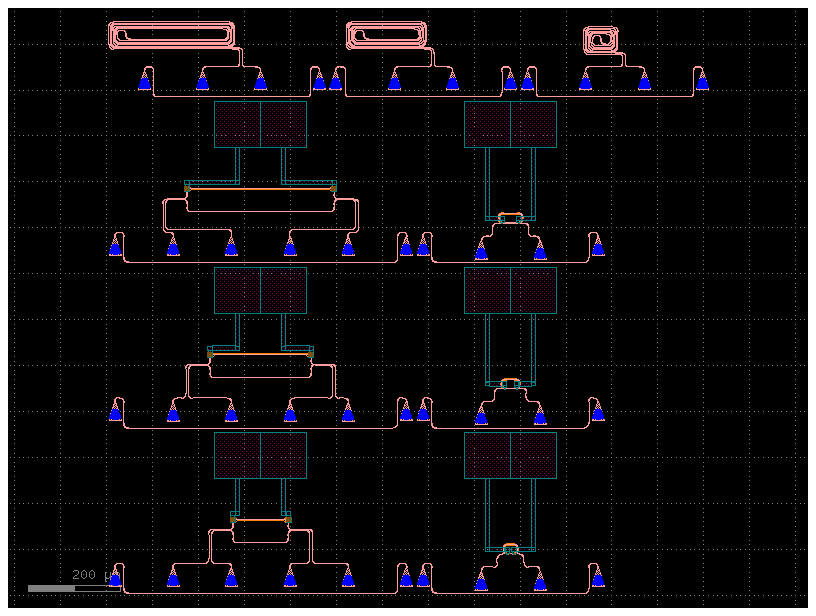

In [1]:
import gdsfactory as gf

from functools import partial

add_fiber_array_optical_south_electrical_north = partial(
    gf.components.add_fiber_array_optical_south_electrical_north,
    pad=gf.c.pad,
    grating_coupler=gf.c.grating_coupler_te,
    cross_section_metal="metal_routing",
)


def sample_reticle(grid: bool = False, **kwargs) -> gf.Component:
    """Returns MZI with TE grating couplers.

    Args:
        grid: if True returns components on a regular grid. False packs them as close as possible.
        kwargs: passed to pack or grid.
    """
    test_info_mzi_heaters = dict(
        doe="mzis_heaters",
        analysis="mzi_heater",
        measurement="optical_loopback4_heater_sweep",
    )
    test_info_ring_heaters = dict(
        doe="ring_heaters",
        analysis="ring_heater",
        measurement="optical_loopback2_heater_sweep",
    )
    spiral_info = dict(
        doe="spirals_sc",
        measurement="optical_loopback4",
        analysis="optical_loopback4_spirals",
    )

    mzis = []
    rings = []
    spirals = []

    for length in [100, 200, 300]:
        mzi = gf.components.mzi2x2_2x2_phase_shifter(
            length_x=length, auto_rename_ports=False
        )
        mzi = add_fiber_array_optical_south_electrical_north(
            mzi,
            electrical_port_names=["top_l_e2", "top_r_e2"],
        )
        mzi.name = f"mzi_heater_{length}"
        mzi.info.update(test_info_mzi_heaters)
        mzis.append(mzi)

    for length_x in [10, 20, 30]:
        ring = gf.components.ring_single_heater(length_x=length_x)
        ring = add_fiber_array_optical_south_electrical_north(
            ring,
            electrical_port_names=["l_e2", "r_e2"],
        )
        ring.info.update(test_info_ring_heaters)
        ring.name = f"ring_single_heater_{length_x}"
        rings.append(ring)

    for length in [0, 100, 200]:
        spiral = gf.c.spiral(length=length)
        spiral = gf.routing.add_fiber_array(spiral)
        spiral.name = f"spiral_{length}"
        spiral.info.update(spiral_info)
        spirals.append(spiral)

    components = mzis + rings + spirals

    if grid:
        return gf.grid(components, name_ports_with_component_name=True, **kwargs)
    c = gf.pack(components, **kwargs)
    if len(c) > 1:
        raise ValueError(f"failed to pack into single group. Made {len(c)} groups.")
    return c[0]


m = sample_reticle()
m


In [2]:
from functools import partial

import gdsfactory as gf
import numpy as np
import ray
import ray.air
import ray.air.session
from gdsfactory.config import PATH
from gdsfactory.generic_tech import get_generic_pdk
from ray import tune

import gplugins.gmeep as gm

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

tmp = PATH.optimiser
tmp.mkdir(exist_ok=True)

2024-08-23 17:27:27,788	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-23 17:27:28,222	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


ModuleNotFoundError: No module named 'meep.materials'

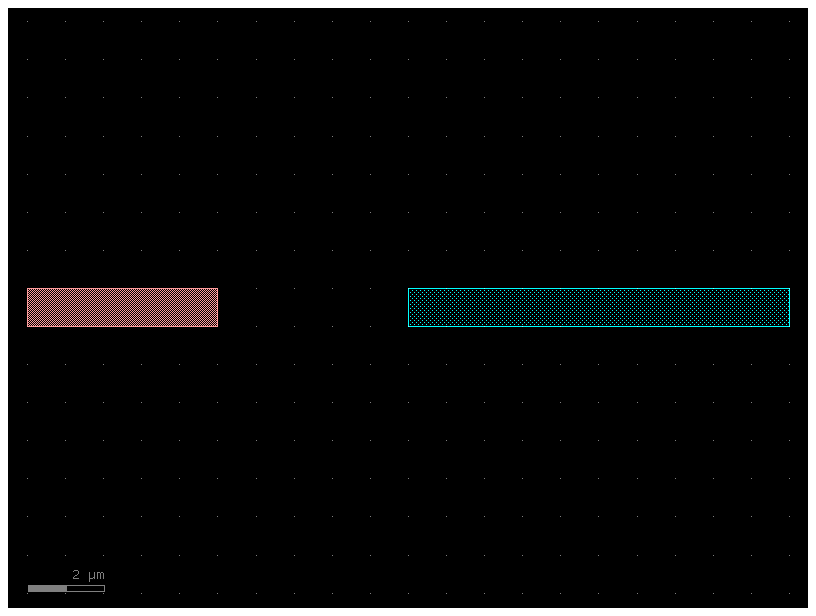

In [17]:
import gdsfactory as gf


def straight(length=10, width=1, layer=(1, 0)):
    c = gf.Component()
    c.add_polygon([(0, 0), (length, 0), (length, width), (0, width)], layer=layer)
    c.add_port(
        name="o1", center=[0, width / 2], width=width, orientation=180, layer=layer
    )
    c.add_port(
        name="o2", center=[length, width / 2], width=width, orientation=0, layer=layer
    )
    return c


c2 = gf.Component()
wg1 = straight(length=5)
wg2 = straight(length=10, layer=(2, 0))
mwg1_ref = c2.add_ref(wg1)
mwg2_ref = c2.add_ref(wg2)
mwg2_ref.dmovex(10)


c2.plot()


# Write the design to a GDS file named "MZI.gds"
c2.write_gds("MZI.gds")

# Show the GDS file in the default viewer, which can be KLayout if properly set up
c2.show()

import gdsfactory as gf

c1 = gf.components.grating_coupler_array(pitch=127, n=2, port_name='o1', rotation=-90, with_loopback=False, cross_section='strip', straight_to_grating_spacing=10, centered=True)

c2 = gf.components.bend_circular(angle=90, cross_section='strip', allow_min_radius_violation=False)


c.plot(c1,c2)


# Write the design to a GDS file named "MZI.gds"
c.write_gds("MZI.gds")

# Show the GDS file in the default viewer, which can be KLayout if properly set up
c.show()



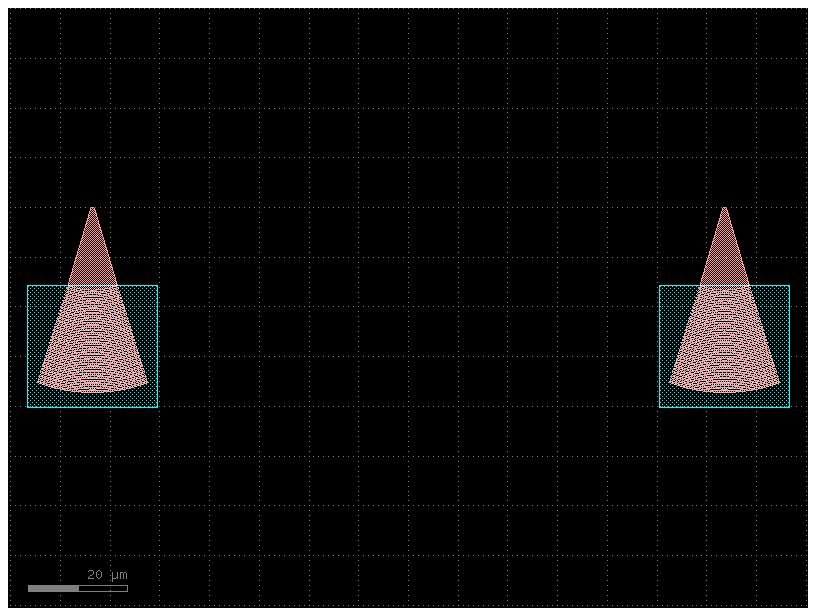

In [28]:
import gdsfactory as gf

c1 = gf.components.grating_coupler_array(pitch=127, n=2, port_name='o1', rotation=-90, with_loopback=False, cross_section='strip', straight_to_grating_spacing=10, centered=True)

c2 = gf.components.bend_circular(angle=90, cross_section='strip', allow_min_radius_violation=False)


c.plot(c1,c2)


# Write the design to a GDS file named "MZI.gds"
c.write_gds("MZI.gds")

# Show the GDS file in the default viewer, which can be KLayout if properly set up
c.show()


C:\Users\Hamed\AppData\Local\Temp\ipykernel_35368\1842645330.py:28: UserWarning: Getting `grating_coupler_array_G_fb01ad77_0_-20098.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `grating_coupler_array_G_fb01ad77_0_-20098.dmove` instead.
  c1_ref.move((0, 0))
C:\Users\Hamed\AppData\Local\Temp\ipykernel_35368\1842645330.py:34: UserWarning: Getting `bend_circular_RNone_A90_35590aa7_5125_4875.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `bend_circular_RNone_A90_35590aa7_5125_4875.dmove` instead.
  c2_ref.move((c1_ref.xmax + 10, 0))  # Move it to the right of c1, with a 10-unit gap
C:\Users\Hamed\AppData\Local\Temp\ipykernel_35368\1842645330.py:34: UserWarning: Getting `grating_coupler_array_G_fb01ad77_0_-20098.xmax` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `grating_coupler_array_G_fb01ad77_0_-20098.dxmax` instead.
  c2_ref.move((c1_ref.xmax + 10, 0))  # Move it to the rig

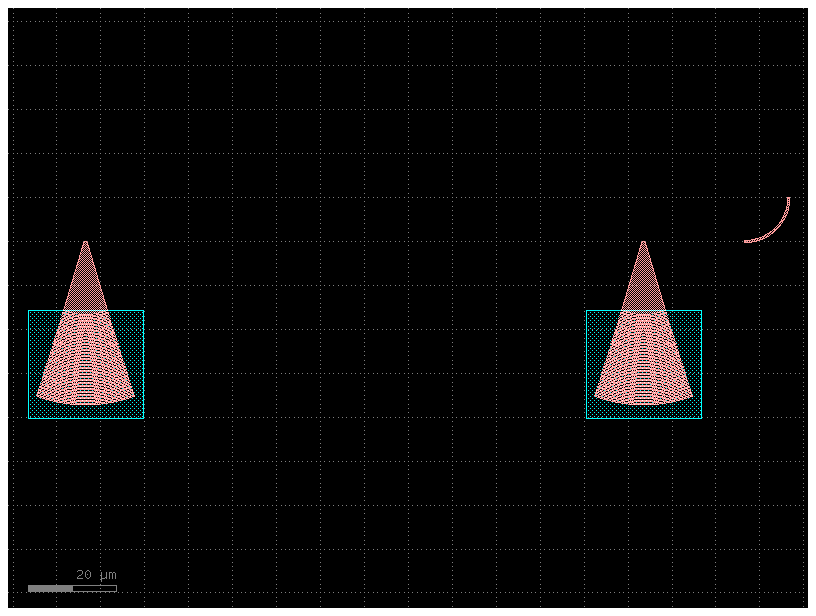

In [40]:
import gdsfactory as gf

# Define the components
c1 = gf.components.grating_coupler_array(
    pitch=127,
    n=2,
    port_name='o1',
    rotation=-90,
    with_loopback=False,
    cross_section='strip',
    straight_to_grating_spacing=10,
    centered=True
)

c2 = gf.components.bend_circular(
    angle=90,
    cross_section='strip',
    allow_min_radius_violation=False
)

# Create a new component to include c1 and c2
main_component = gf.Component()

# Add the grating coupler array to the main component
c1_ref = main_component.add_ref(c1)

# Position the grating coupler array
c1_ref.move((0, 0))

# Add the bend circular to the main component
c2_ref = main_component.add_ref(c2)

# Position the circular bend; adjust coordinates based on your layout needs
c2_ref.move((c1_ref.xmax + 10, 0))  # Move it to the right of c1, with a 10-unit gap

# Optionally, you can connect the ports if needed. Example:
# Connect c1's 'o2' port to c2's 'o1' port

# Plot and save the design
main_component.plot()
main_component.write_gds("MZI_with_coupler_and_bend.gds")

# Show the GDS file in the default viewer
main_component.show()


In [41]:
pip install gdsfactory --upgrade

In [2]:
import sys
print(sys.version)
print(sys.executable)

import gdsfactory as gf
gf.config.print_version_plugins()

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
c:\Users\Hamed\anaconda3\python.exe


AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

In [1]:
import sys
print(sys.version)
print(sys.executable)

import gdsfactory as gf
gf.config.print_version_plugins()

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
c:\Users\Hamed\anaconda3\python.exe


TypeError: list_schema() got an unexpected keyword argument 'fail_fast'

In [2]:
    # Prints the path to the Python executable.

import gdsfactory as gf   # Imports the gdsfactory package.



TypeError: list_schema() got an unexpected keyword argument 'fail_fast'